# DERSE GELMEDEN ÖNCE...
Sayısal Fizik Kitabının pdf link aşağıdadır.  
[SayisalFizik_BekirKaraoglu_2nciBaski.pdf](./SayisalFizik_BekirKaraoglu_2nciBaski.pdf)  
Bu dosyadaki 2. üniteyi Gauss İntegrali kısmına kadar okuyup anlamaya çalışın...

IyMgW1Byb2dyYW1sYW1hIMO2xJ9yZW5tZW5pbiB5YcWfxLEgeW9rIV0oaHR0cHM6Ly95b3V0dS5iZS9ocjF4cDN0VmdVUT90PTE2KQ==


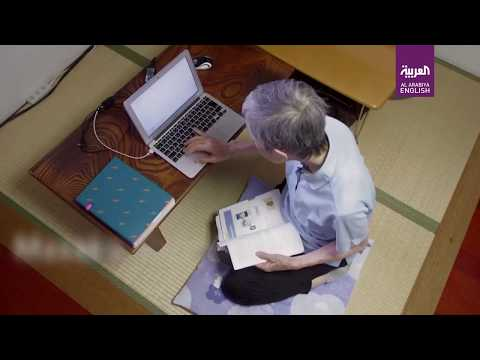

In [1]:
import IPython.display as ipd
vid = ipd.YouTubeVideo('hr1xp3tVgUQ', start=17)
link = ipd.Markdown(r'## [Programlama öğrenmenin yaşı yok!](https://youtu.be/hr1xp3tVgUQ?t=16)')
display(link)
display(vid)

# SAYISAL TÜREV ve İNTEGRAL

## SAYISAL TÜREV

### $f'(x) = \lim_\limits{h\rightarrow0}\frac{f(x+h)-f(x)}{h}$  veya  $f'(x) = \lim_\limits{x\rightarrow x_0}\frac{f(x)-f(x_0)}{x-x_0}$

In [2]:
import sympy as sm
from sympy.parsing.sympy_parser import parse_expr
import IPython.display as ipd
f, x, x_0, h, = sm.symbols('f, x, x_0, h')
f = sm.Function('f')

ft = sm.series(f(x), x, x_0, 4)
ft_tex0 = sm.latex(ft)
ft_texp = sm.latex(ft.subs({x:x_0+h, x_0:x}))
ft_texm = sm.latex(ft.subs({x:x_0-h, x_0:x}))

ft_tex0 = ft_tex0.replace(r'\rightarrow', r'\rightarrow ') # rightarrow'ün sağına bir boşluk ekle
ipd.display(ipd.Markdown("### $f(x) = %s$"%ft_tex0))
ipd.display(ipd.Markdown("### $f(x+h) = %s$"%ft_texp))
ipd.display(ipd.Markdown("### $f(x-h) = %s$"%ft_texm))

### $f(x) = f{\left(x_{0} \right)} + \left(x - x_{0}\right) \left. \frac{d}{d \xi_{1}} f{\left(\xi_{1} \right)} \right|_{\substack{ \xi_{1}=x_{0} }} + \frac{\left(x - x_{0}\right)^{2} \left. \frac{d^{2}}{d \xi_{1}^{2}} f{\left(\xi_{1} \right)} \right|_{\substack{ \xi_{1}=x_{0} }}}{2} + \frac{\left(x - x_{0}\right)^{3} \left. \frac{d^{3}}{d \xi_{1}^{3}} f{\left(\xi_{1} \right)} \right|_{\substack{ \xi_{1}=x_{0} }}}{6} + O\left(\left(x - x_{0}\right)^{4}; x\rightarrow  x_{0}\right)$

### $f(x+h) = f{\left(x \right)} + h \left. \frac{d}{d \xi_{1}} f{\left(\xi_{1} \right)} \right|_{\substack{ \xi_{1}=x }} + \frac{h^{2} \left. \frac{d^{2}}{d \xi_{1}^{2}} f{\left(\xi_{1} \right)} \right|_{\substack{ \xi_{1}=x }}}{2} + \frac{h^{3} \left. \frac{d^{3}}{d \xi_{1}^{3}} f{\left(\xi_{1} \right)} \right|_{\substack{ \xi_{1}=x }}}{6} + O\left(h^{4}\right)$

### $f(x-h) = f{\left(x \right)} - h \left. \frac{d}{d \xi_{1}} f{\left(\xi_{1} \right)} \right|_{\substack{ \xi_{1}=x }} + \frac{h^{2} \left. \frac{d^{2}}{d \xi_{1}^{2}} f{\left(\xi_{1} \right)} \right|_{\substack{ \xi_{1}=x }}}{2} - \frac{h^{3} \left. \frac{d^{3}}{d \xi_{1}^{3}} f{\left(\xi_{1} \right)} \right|_{\substack{ \xi_{1}=x }}}{6} + O\left(h^{4}\right)$

In [3]:
import sympy as sm
import IPython.display as ipd
f, x, x0, h = sm.symbols('f, x, x0, h')
f = sm.Function('f')

def ft(f, x, h=0, n=3):
    x0 = sm.symbols('x0')
    theSeries = sm.series(f(x), x, x0, n).doit()
    if h == 0:
        ss = theSeries
    else:
        ss = theSeries.subs({x:x0+h, x0:x})
    ssl = sm.latex(ss).replace(r'\rightarrow', r'\rightarrow ')
    return ss, ssl

fxph, fxpl = ft(f, x, h)
fxmh, fxml = ft(f, x, -h)
fx_left = f(x+h) - f(x-h)
fx_right = fxph - fxmh

solwO = sm.expand(sm.solve(fx_left-fx_right, sm.Derivative(f(x), x))[0])
sol = solwO.removeO()
OO = solwO - sol
solO = sm.simplify(sol) + OO

ipd.display(ipd.Markdown("$%s = %s$"%(f(x+h), fxpl)))
ipd.display(ipd.Markdown("$%s = %s$"%(f(x-h), fxml)))
ipd.display(ipd.Markdown("$%s = %s$"%(fx_left, sm.latex(fx_right))))
ipd.display(ipd.Markdown("$%s = %s$"%(sm.latex(sm.Derivative(f(x), x)), sm.latex(solO))))

$f(h + x) = f{\left(x \right)} + h \frac{d}{d x} f{\left(x \right)} + \frac{h^{2} \frac{d^{2}}{d x^{2}} f{\left(x \right)}}{2} + O\left(h^{3}\right)$

$f(-h + x) = f{\left(x \right)} - h \frac{d}{d x} f{\left(x \right)} + \frac{h^{2} \frac{d^{2}}{d x^{2}} f{\left(x \right)}}{2} + O\left(h^{3}\right)$

$-f(-h + x) + f(h + x) = 2 h \frac{d}{d x} f{\left(x \right)} + O\left(h^{3}\right)$

$\frac{d}{d x} f{\left(x \right)} = \frac{- f{\left(- h + x \right)} + f{\left(h + x \right)}}{2 h} + O\left(h^{2}\right)$

---
### $\xi_{1} \rightarrow x$
### $f(x+h) = f(x) + h f'(x)  + \frac{h^2}{2} f''(x)  + \frac{h^{3}}{6} f'''(x) + \mathcal{O}\left(h^{4}\right)$
### $h f'(x) = f(x+h) - f(x) -  \frac{h^2}{2} f''(x)  - \frac{h^{3}}{6} f'''(x) + \mathcal{O}\left(h^{4}\right)$
### $f'(x) = \frac{1}{h}\left[ f(x+h) - f(x) -  \frac{h^2}{2} f''(x)  - \frac{h^{3}}{6} f'''(x) + \mathcal{O}\left(h^{4}\right)\right]$
### $f'(x) = \frac{f(x+h) - f(x)}{h} - \frac{h}{2} f''(x)  - \frac{h^{2}}{6} f'''(x) + \frac{1}{h}\mathcal{O}\left(h^{4}\right)$
### $f'(x) = \frac{f(x+h) - f(x)}{h} -h \left[\frac{1}{2} f''(x)  - \frac{h}{6} f'''(x) + \frac{1}{h^2}\mathcal{O}\left(h^{4}\right)\right]$
### $f'(x) = \frac{f(x+h) - f(x)}{h} + \mathcal{O}(h)$
### $f'(x) \eqsim \frac{f(x+h) - f(x)}{h}$

In [4]:
# Yukarıdaki yöntemi kullanarak verilen herhangi bir f(x) fonksiyonun
# x = x_0 noktasında (x_0 herhangi bir reel sayı) sayısal türevini alan
# programı yazınız.

# ileri türev
x = 1.
h = 0.1

def f(x):
    return x**2 + x**3

fts = (f(x+h) - f(x))/h
ftt = 2*x + 3*x**2

print ftt, fts, fts-ftt

5.0 5.41 0.41


In [5]:
# simetrik türev
x = 1.
h = 0.1

def f(x):
    return x**2 + x**3

fts = (f(x+h) - f(x-h))/(2.*h)
ftt = 2*x + 3*x**2

print ftt, fts, fts-ftt

5.0 5.01 0.01


## $f'(x) = \frac{f(x-2h) - 8f(x-h) + 8f(x+h) - f(x+2h)}{12h}$

In [6]:
import sympy as sm
import IPython.display as ipd
f, x, x0, h = sm.symbols('f, x, x0, h')
f = sm.Function('f')

def ft(f, x, h=0, n=3):
    x0 = sm.symbols('x0')
    theSeries = sm.series(f(x), x, x0, n).doit()
    if h == 0:
        ss = theSeries
    else:
        ss = theSeries.subs({x:x0+h, x0:x})
    ssl = sm.latex(ss).replace(r'\rightarrow', r'\rightarrow ')
    return ss, ssl

n=5
fxph, fxpl = ft(f, x, h, n)
fxmh, fxml = ft(f, x, -h, n)
fxp2h, fxp2l = ft(f, x, 2*h, n)
fxm2h, fxm2l = ft(f, x, -2*h, n)


fx_left = f(x-2*h) - 8*f(x-h) + 8*f(x+h) - f(x+2-h)
fx_right = fxm2h - 8*fxmh + 8*fxph - fxp2h

solwO = sm.expand(sm.solve(fx_left-fx_right, sm.Derivative(f(x), x))[0])
sol = solwO.removeO()
OO = solwO - sol
solO = sm.simplify(sol) + OO

ipd.display(ipd.Markdown("$%s = %s$"%(f(x+h), fxpl)))
ipd.display(ipd.Markdown("$%s = %s$"%(f(x+2*h), fxp2l)))
ipd.display(ipd.Markdown("$%s = %s$"%(f(x-h), fxml)))
ipd.display(ipd.Markdown("$%s = %s$"%(f(x-2*h), fxm2l)))
ipd.display(ipd.Markdown("$%s = %s$"%(sm.latex(fx_left), sm.latex(fx_right))))
ipd.display(ipd.Markdown("$%s = %s$"%(sm.latex(sm.Derivative(f(x), x)), sm.latex(solO))))

$f(h + x) = f{\left(x \right)} + h \frac{d}{d x} f{\left(x \right)} + \frac{h^{2} \frac{d^{2}}{d x^{2}} f{\left(x \right)}}{2} + \frac{h^{3} \frac{d^{3}}{d x^{3}} f{\left(x \right)}}{6} + \frac{h^{4} \frac{d^{4}}{d x^{4}} f{\left(x \right)}}{24} + O\left(h^{5}\right)$

$f(2*h + x) = f{\left(x \right)} + 2 h \frac{d}{d x} f{\left(x \right)} + 2 h^{2} \frac{d^{2}}{d x^{2}} f{\left(x \right)} + \frac{4 h^{3} \frac{d^{3}}{d x^{3}} f{\left(x \right)}}{3} + \frac{2 h^{4} \frac{d^{4}}{d x^{4}} f{\left(x \right)}}{3} + O\left(h^{5}\right)$

$f(-h + x) = f{\left(x \right)} - h \frac{d}{d x} f{\left(x \right)} + \frac{h^{2} \frac{d^{2}}{d x^{2}} f{\left(x \right)}}{2} - \frac{h^{3} \frac{d^{3}}{d x^{3}} f{\left(x \right)}}{6} + \frac{h^{4} \frac{d^{4}}{d x^{4}} f{\left(x \right)}}{24} + O\left(h^{5}\right)$

$f(-2*h + x) = f{\left(x \right)} - 2 h \frac{d}{d x} f{\left(x \right)} + 2 h^{2} \frac{d^{2}}{d x^{2}} f{\left(x \right)} - \frac{4 h^{3} \frac{d^{3}}{d x^{3}} f{\left(x \right)}}{3} + \frac{2 h^{4} \frac{d^{4}}{d x^{4}} f{\left(x \right)}}{3} + O\left(h^{5}\right)$

$f{\left(- 2 h + x \right)} - 8 f{\left(- h + x \right)} + 8 f{\left(h + x \right)} - f{\left(- h + x + 2 \right)} = - (8 f{\left(x \right)} - 8 h \frac{d}{d x} f{\left(x \right)} + 4 h^{2} \frac{d^{2}}{d x^{2}} f{\left(x \right)} - \frac{4 h^{3} \frac{d^{3}}{d x^{3}} f{\left(x \right)}}{3} + \frac{h^{4} \frac{d^{4}}{d x^{4}} f{\left(x \right)}}{3} + O\left(h^{5}\right)) + 8 f{\left(x \right)} + 4 h \frac{d}{d x} f{\left(x \right)} + 4 h^{2} \frac{d^{2}}{d x^{2}} f{\left(x \right)} - \frac{4 h^{3} \frac{d^{3}}{d x^{3}} f{\left(x \right)}}{3} + \frac{h^{4} \frac{d^{4}}{d x^{4}} f{\left(x \right)}}{3} + O\left(h^{5}\right)$

$\frac{d}{d x} f{\left(x \right)} = \frac{f{\left(- 2 h + x \right)} - 8 f{\left(- h + x \right)} + 8 f{\left(h + x \right)} - f{\left(- h + x + 2 \right)}}{12 h} + O\left(h^{4}\right)$

In [7]:
x = 1.
h = 0.1

def f(x):
    return x**2 + x**3

fts = (f(x-2*h) - 8*f(x-h) + 8*f(x+h) - f(x+2*h))/(12.*h)
ftt = 2*x + 3*x**2

print ftt, fts, fts-ftt

5.0 5.0 1.7763568394e-15


In [8]:
# simetrik türev
x = 1.
h = 0.1

def f(x):
    return x**2 + x**3

fts1 = (f(x+h) - f(x-h))/(2.*h)
fts2 = (f(x+h) -  2*f(x) + f(x-h))/h**2.

ftt1 = 2*x + 3*x**2
ftt2 = 2 + 6*x

print ftt1, fts1, fts1-ftt1
print ftt2, fts2, fts2-ftt2

5.0 5.01 0.01
8.0 8.0 4.97379915032e-14


## Sayısal Türev Kavramının Bir Fizik Problemine Uygulanması

Bir boyutlu hareket eden  bir sistemin konumunun ve hızının zaman bağlılığı  
Newton'un 2nci ($\large \vec F = m \vec a$) yasası kullanılarak aşağıdaki gibi hesaplanabilir.

$F = m {\Delta v \over \Delta t} \implies {\Delta v \over \Delta t} = {F \over m} \implies {v(t+\Delta t) = v(t) + {F\over m}\Delta t}$

$v =  {\Delta x \over \Delta t} \implies \Delta x = v \Delta t \implies x(t+\Delta t) = x(t) + v(t) \Delta t $

### $F = -kx$ kuvveti uygulanan yay için örnek:

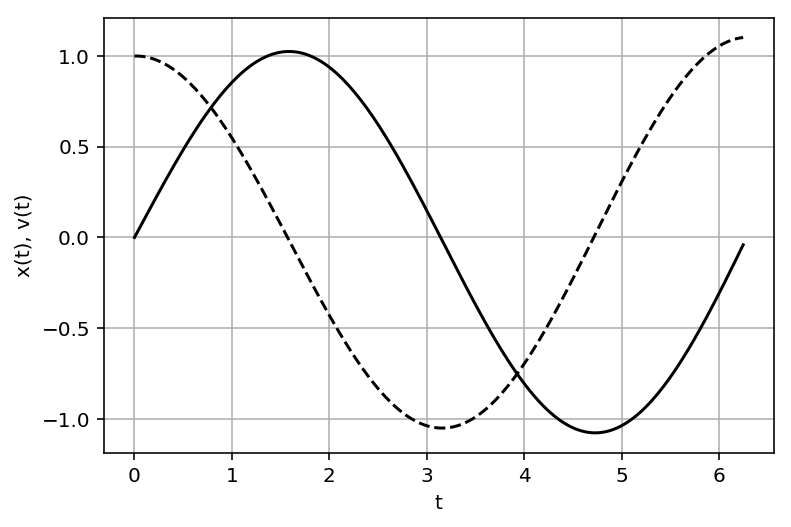

In [9]:
# Kitapta pylab ve numpy kütüphaneleri kullanılarak
# F = -kx kuvvetli yay sistemi için çözüm.

from pylab import *
from numpy import *

def f(x,v,t):
    return -x

n=200
h=6.28/float(n)
t=zeros(n,float)
x=zeros(n,float)
v=zeros(n,float)
v[0]=1.0

for i in range(1,n):
    t[i]=h*i
    x[i]=x[i-1]+v[i-1]*h
    v[i]=v[i-1]+f(x[i-1],v[i-1],t[i-1])*h

plot(t,x,"k-")
plot(t,v,"k--")
xlabel("t")
ylabel("x(t), v(t)")
grid()
show()


### $F = -kx$ kuvveti uygulanan yay için örnek: (Python programı farklı)

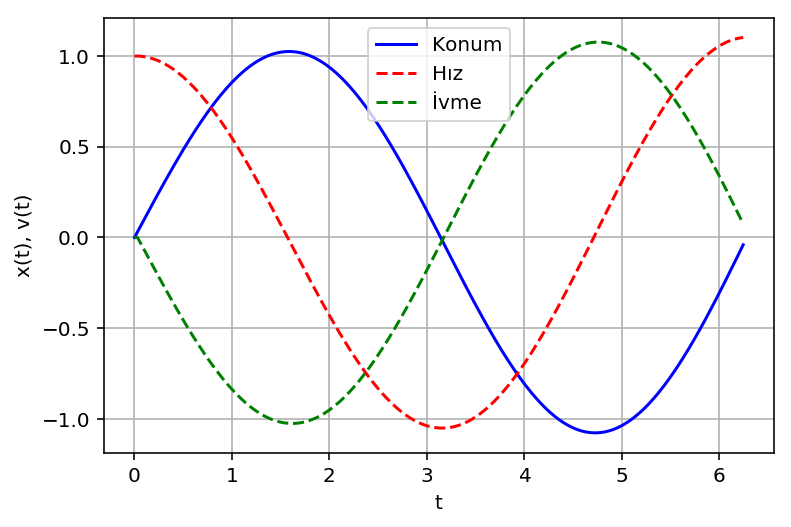

In [10]:
# Hesaplama için standart Python, çizim için matplotlib.pyplot 
# kullanılarak F = -kx kuvvetli yay sistemi için çözüm.

import matplotlib.pyplot as plt
%matplotlib inline

def f(x,v,t):
    return -x # harmonik salınıcı
n=200
h=6.28/float(n)
t = [0]
x = [0]
v = [1.0]
a = [0.]

for i in range(1,n):
    t = t + [h*i]
    x = x + [ x[i-1] + v[i-1]*h]
    v += [v[i-1] + f(x[i-1],v[i-1],t[i-1])*h]
    a += [(v[i]-v[i-1])/h]

plt.plot(t,x,"b-", label="Konum")
plt.plot(t,v,"r--", label=u"Hız")
plt.plot(t,a,"g--", label=u"İvme")
plt.xlabel("t")
plt.ylabel("x(t), v(t)")
plt.grid()
plt.legend()
plt.show()

### Kinematik fonksiyonu

Yukarıdaki hesaplamaları ve çizimi yapan kısım Python fonksiyonu  
olarak yeniden yazıldı. Böylece sadece kuvvet fonksiyonu ve başlangıç  
değerleri tanımlanarak sistemler incelenebilir.

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

def kinematik(n = 100, t0=0., tn=10.0, x0=0., v0=1., a0=-10.):
    t, x, v, a = [t0], [x0], [v0], [a0]
    dt = abs(tn-t0)/float(n)
    for i in range(1, n):
        t += [dt*i]
        x += [ x[i-1] + v[i-1]*dt]
        v += [v[i-1] + f(x[i-1],v[i-1],t[i-1])*dt]
        a += [(v[i]-v[i-1])/dt]

    plt.plot(t,x,"b-", label="Konum")
    plt.plot(t,v,"r--", label=u"Hız")
    plt.plot(t,a,"g--", label=u"İvme")
    plt.xlabel("t")
    plt.ylabel("x(t), v(t)")
    plt.grid()
    plt.legend()
    plt.show()

### Serbest düşen cisim:
#### $\Sigma F = - m g$

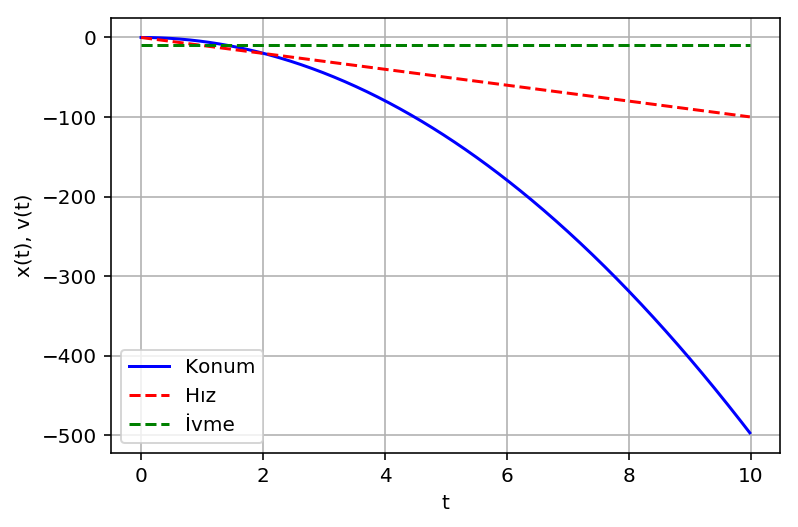

In [12]:
def f(x,v,t):
    return -10

#kinematik(n = 100, t0=0., tn=10.0, x0=0., v0=1., a0=-10.)
kinematik(n=500, v0=0.)

### Direnç kuvveti varken:
#### $\Sigma F = - m g + c v^2$

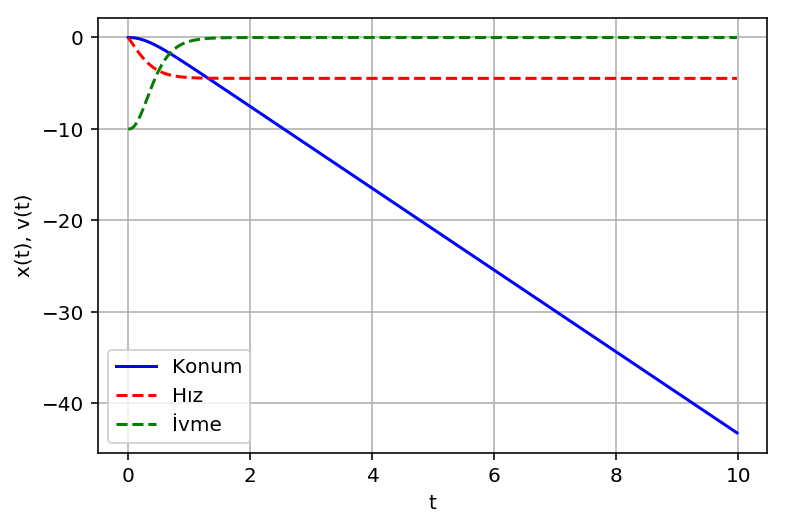

In [13]:
def f(x,v,t):
    return -10+.5*v**2

#kinematik(n = 100, t0=0., tn=10.0, x0=0., v0=1., a0=-10.)
kinematik(n=500, v0=0.)

### Harmonik salıncı
#### $\Sigma F = -kx$ durumu:

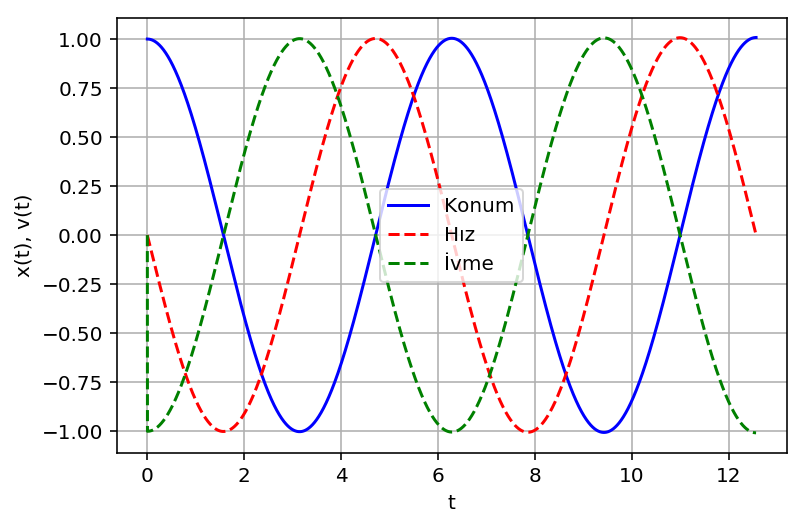

In [14]:
def f(x,v,t):
    return -x

pi = 3.14159
kinematik(n = 10000, tn=4*pi, x0=1., v0=0., a0=0.)

### Sönümlü yayın davranışı:

#### $\Sigma F = -kx - b v$ durumu:

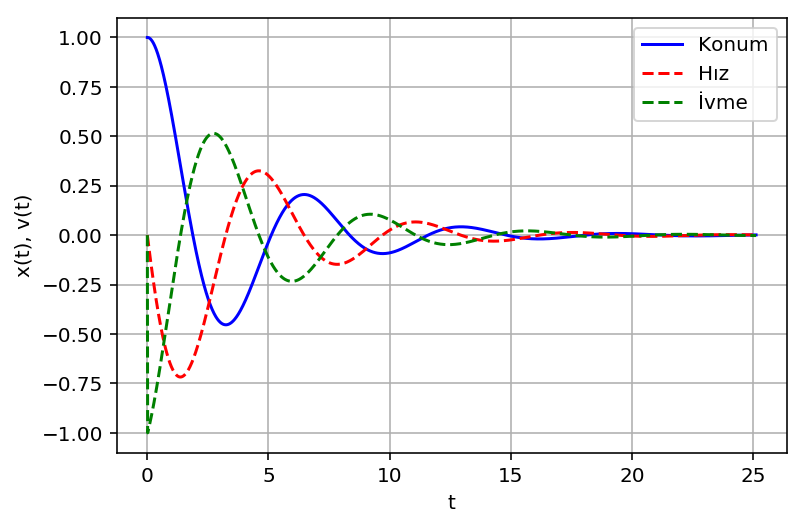

In [15]:
def f(x,v,t):
    return -x - .5*v # sönümlü harmonik salınıcı

pi = 3.14159
kinematik(n = 2000, tn=8*pi, x0=1., v0=0., a0=0.)

#### Direnç kuvveti $\Sigma F = -kx - c v^2$ durumu:

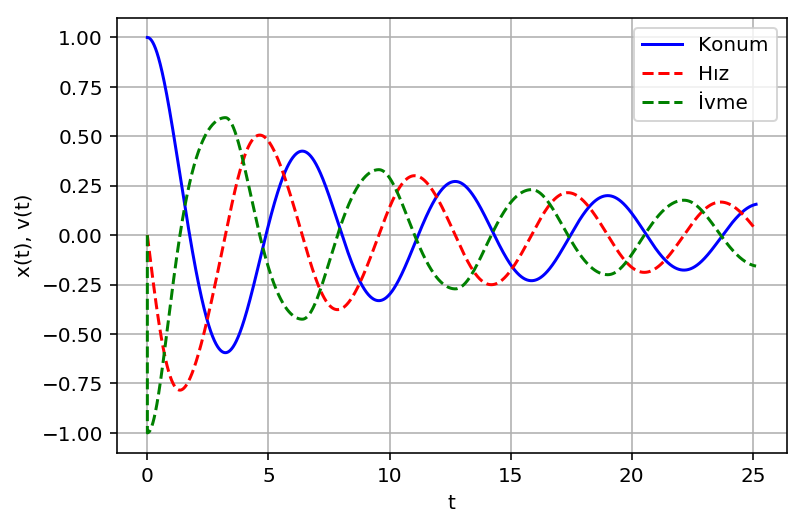

In [16]:
def f(x,v,t):
    return -x - .5*v**3/abs(v) # sönümlü harmonik salınıcı

pi = 3.14159
kinematik(n = 20000, tn=8*pi, x0=1., v0=1e-17, a0=0.)

## y=f(x) şeklinde bir fonksiyonun çizimi

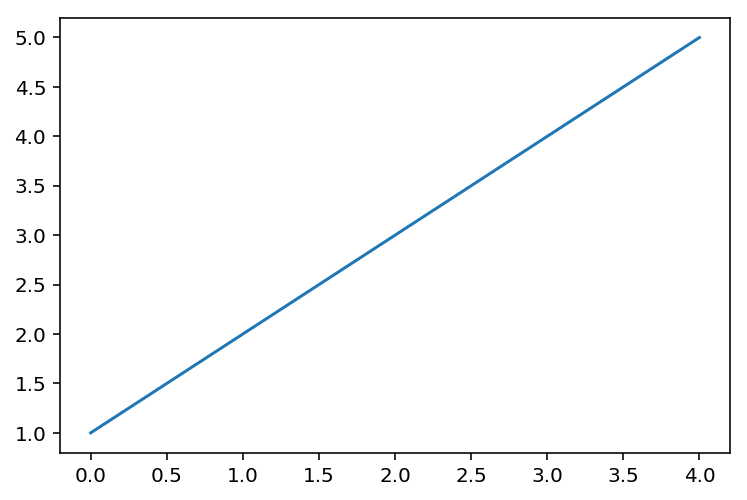

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot([1,2,3,4,5])
plt.show()

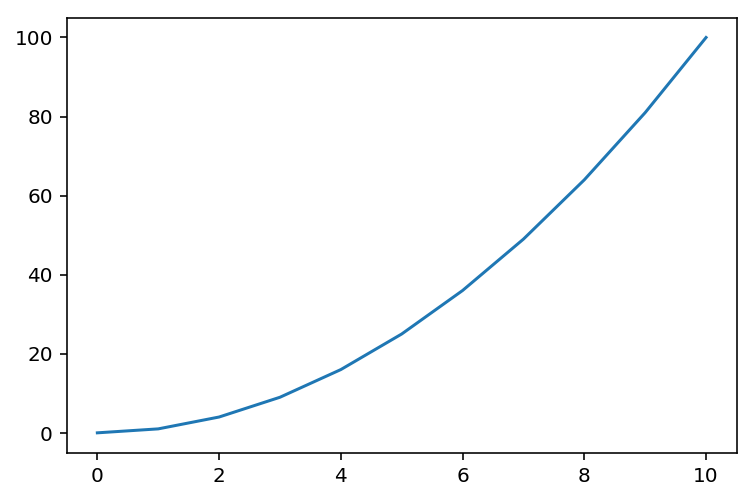

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

def f(x):
    return x**2

xi = 0.
xs = 10.
nn = 10.
dx = abs(xs-xi)/nn

xl = []
yl = []

x = xi
while x<=xs:
    xl = xl + [x]
    yl = yl + [f(x)]
    x = x + dx

plt.plot(xl, yl)
plt.show()

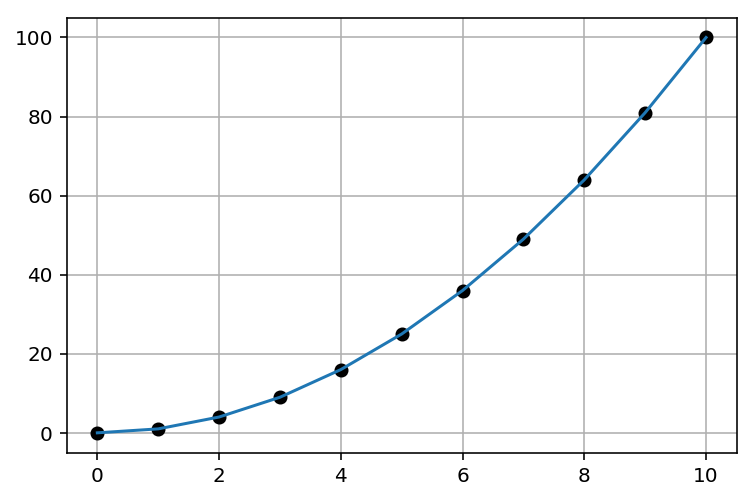

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

def f(x):
    return x**2

xi = 0.
xs = 10.
nn = 10.
dx = abs(xs-xi)/nn

xl = []
yl = []

x = xi
while x<=xs:
    xl = xl + [x]
    yl = yl + [f(x)]
    x = x + dx

# renkler
# {'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'}
plt.plot(xl, yl, "ko")
plt.plot(xl, yl)
plt.grid()
plt.show()

# SAYISAL İNTEGRAL

### f(x) = x fonksiyonunun sayısal integrali
#### Sol kenar kullanılarak alınan integral

In [20]:
def f(x):
    return x

xi = 0.
xs = 10.
nn = 10.
dx = abs(xs-xi)/nn

i = 0.
toplam = 0.
print "%5s %5s"%("x", "f(x)")

while i<nn:
    x = xi + i*dx
    i = i + 1
    toplam = toplam + f(x)
    print "%5s %5s"%(x, f(x))

toplam = toplam*dx
print "f(x)'in %s ile %s aralığındaki integrali = %s"%(xi, xs, toplam)

    x  f(x)
  0.0   0.0
  1.0   1.0
  2.0   2.0
  3.0   3.0
  4.0   4.0
  5.0   5.0
  6.0   6.0
  7.0   7.0
  8.0   8.0
  9.0   9.0
f(x)'in 0.0 ile 10.0 aralığındaki integrali = 45.0


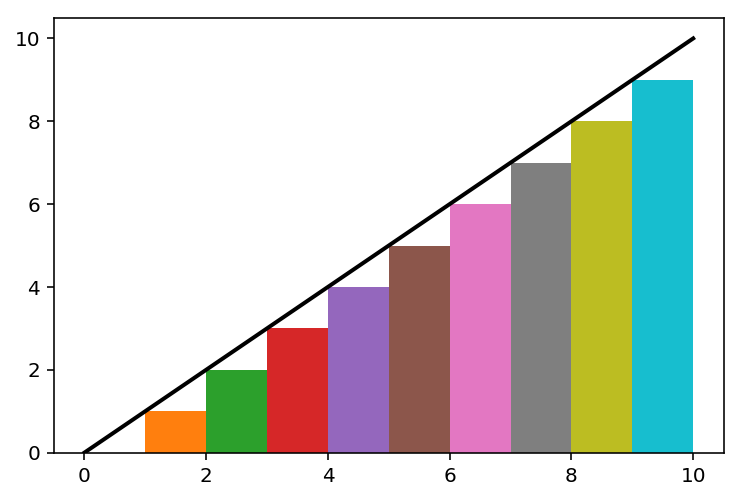

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline


xl = [xi+i*dx for i in range(int(nn+1))]
fl = [f(x) for x in xl]

for i, x in enumerate(xl[:-1]):
    plt.bar(x+dx/2., fl[i], dx)

plt.plot(xl, fl, "k-", lw="2")
plt.show()

### f(x) = x fonksiyonunun sayısal integrali
#### Sağ kenar kullanılarak alınan integral

In [22]:
def f(x):
    return x

xi = 0.
xs = 10.
nn = 10.
dx = abs(xs-xi)/nn

i = 1.
toplam = 0.
print "%5s %5s"%("x", "f(x)")
while i<=nn:
    x = xi + i*dx
    i = i + 1
    toplam = toplam + f(x)
    print "%5s %5s"%(x, f(x))

toplam = toplam*dx
print "f(x)'in %s ile %s aralığındaki integrali = %s"%(xi, xs, toplam)

    x  f(x)
  1.0   1.0
  2.0   2.0
  3.0   3.0
  4.0   4.0
  5.0   5.0
  6.0   6.0
  7.0   7.0
  8.0   8.0
  9.0   9.0
 10.0  10.0
f(x)'in 0.0 ile 10.0 aralığındaki integrali = 55.0


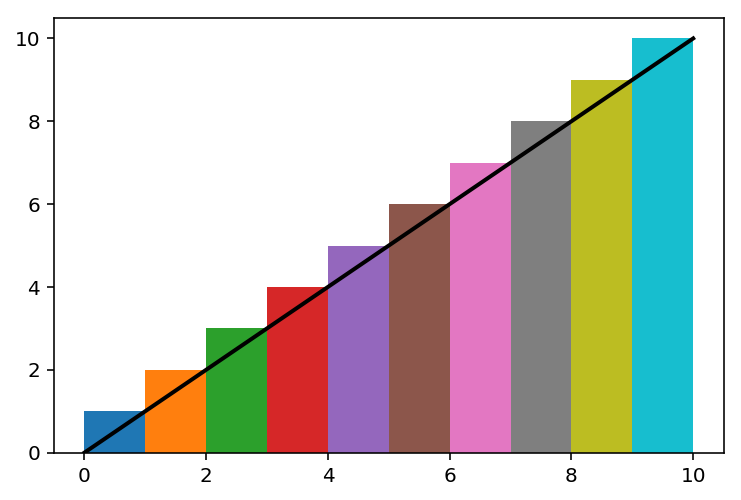

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

xl = [xi+i*dx for i in range(int(nn+1))]
fl = [f(x) for x in xl]

for i, x in enumerate(xl[1:]):
    plt.bar(x-dx/2., fl[i+1], dx)

plt.plot(xl, fl, "k-", lw="2")
plt.show()

### f(x) = exp(x) fonksiyonunun integrali
#### Sol kenar kullanılarak alınan integral

In [24]:
from math import *

def f(x):
    return exp(x)

xi = 0.
xs = 4.
nn = 10.
dx = abs(xs-xi)/nn

i = 0.
toplam = 0.
print "%5s %5s"%("x", "f(x)")
while i<nn:
    x = xi + i*dx
    i = i + 1
    toplam = toplam + f(x)
    #print "%5s %5s"%(x, f(x))

toplam = toplam*dx
print "f(x)'in %s ile %s aralığındaki integrali = %s"%(xi, xs, toplam)
print "f(x)'in tam integrali = %s"%(exp(4)-1)

    x  f(x)
f(x)'in 0.0 ile 4.0 aralığındaki integrali = 43.5912635459
f(x)'in tam integrali = 53.5981500331


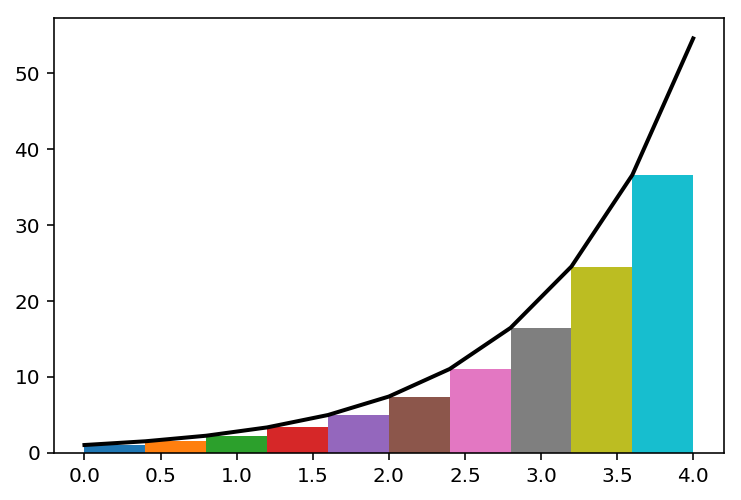

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

xl = [xi+i*dx for i in range(int(nn+1))]
fl = [f(x) for x in xl]

for i, x in enumerate(xl[:-1]):
    plt.bar(x+dx/2., fl[i], dx)

plt.plot(xl, fl, "k-", lw="2")
plt.show()

### f(x) = exp(x) fonksiyonunun integrali
#### Sağ kenar kullanılarak alınan integral

In [26]:
from math import *

def f(x):
    return exp(x)

xi = 0.
xs = 4.
nn = 10.
dx = abs(xs-xi)/nn

i = 1.
toplam = 0.
print "%5s %5s"%("x", "f(x)")
while i<=nn:
    x = xi + i*dx
    i = i + 1
    toplam = toplam + f(x)
    print "%5s %5s"%(x, f(x))

toplam = toplam*dx
print "f(x)'in %s ile %s aralığındaki integrali = %s"%(xi, xs, toplam)

    x  f(x)
  0.4 1.49182469764
  0.8 2.22554092849
  1.2 3.32011692274
  1.6 4.9530324244
  2.0 7.38905609893
  2.4 11.0231763806
  2.8 16.4446467711
  3.2 24.5325301971
  3.6 36.5982344437
  4.0 54.5981500331
f(x)'in 0.0 ile 4.0 aralığındaki integrali = 65.0305235591


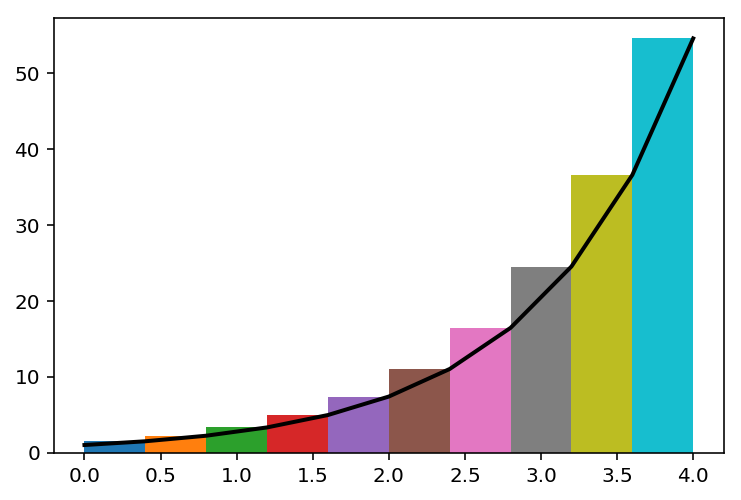

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

xl = [xi+i*dx for i in range(int(nn+1))]
fl = [f(x) for x in xl]

for i, x in enumerate(xl[1:]):
    plt.bar(x-dx/2., fl[i+1], dx)

plt.plot(xl, fl, "k-", lw="2")
plt.show()

### f(x) = sin(x) fonksiyonunun integrali
#### Sol kenar kullanılarak alınan integral

In [28]:
from math import *

def f(x):
    return sin(x)

xi = 0.
xs = 2*pi
nn = 15.
dx = abs(xs-xi)/nn

i = 0.
toplam = 0.
print "%5s %5s"%("x", "f(x)")
while i<nn:
    x = xi + i*dx
    i = i + 1
    toplam = toplam + f(x)
    print "%5s %5s"%(x, f(x))

toplam = toplam*dx
print "f(x)'in %s ile %s aralığındaki integrali = %s"%(xi, xs, toplam)

    x  f(x)
  0.0   0.0
0.418879020479 0.406736643076
0.837758040957 0.743144825477
1.25663706144 0.951056516295
1.67551608191 0.994521895368
2.09439510239 0.866025403784
2.51327412287 0.587785252292
2.93215314335 0.207911690818
3.35103216383 -0.207911690818
3.76991118431 -0.587785252292
4.18879020479 -0.866025403784
4.60766922527 -0.994521895368
5.02654824574 -0.951056516295
5.44542726622 -0.743144825477
5.8643062867 -0.406736643076
f(x)'in 0.0 ile 6.28318530718 aralığındaki integrali = 1.86019653227e-16


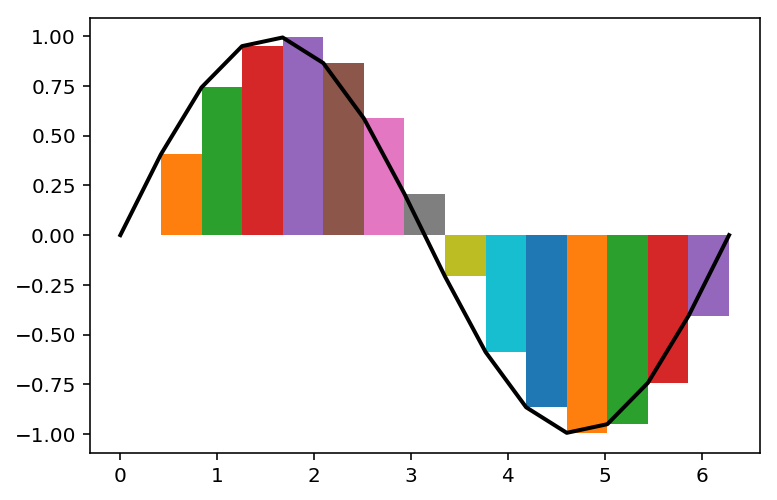

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

xl = [xi+i*dx for i in range(int(nn+1))]
fl = [f(x) for x in xl]

for i, x in enumerate(xl[:-1]):
    plt.bar(x+dx/2., fl[i], dx)

plt.plot(xl, fl, "k-", lw="2")
plt.show()

### f(x) = sin(x) fonksiyonunun integrali
#### Sağ kenar kullanılarak alınan integral

In [30]:
from math import *

def f(x):
    return sin(x)

xi = 0.
xs = 2*pi
nn = 15.
dx = abs(xs-xi)/nn

i = 1.
toplam = 0.
print "%13s %26s"%("x", "f(x)")
while i<=nn:
    x = xi + i*dx
    i = i + 1
    toplam = toplam + f(x)
    print "%+25.20f %+25.20f"%(x, f(x))

toplam = toplam*dx
print "f(x)'in %s ile %s aralığındaki integrali = %s"%(xi, xs, toplam)

            x                       f(x)
  +0.41887902047863906363   +0.40673664307580015276
  +0.83775804095727812726   +0.74314482547739413310
  +1.25663706143591724640   +0.95105651629515353118
  +1.67551608191455625452   +0.99452189536827340088
  +2.09439510239319526264   +0.86602540378443870761
  +2.51327412287183449280   +0.58778525229247324813
  +2.93215314335047327887   +0.20791169081775973115
  +3.35103216382911250903   -0.20791169081775906502
  +3.76991118430775173920   -0.58778525229247302608
  +4.18879020478639052527   -0.86602540378443837454
  +4.60766922526502931134   -0.99452189536827328986
  +5.02654824574366898560   -0.95105651629515364220
  +5.44542726622230777167   -0.74314482547739457718
  +5.86430628670094655774   -0.40673664307580092991
  +6.28318530717958623200   -0.00000000000000024493
f(x)'in 0.0 ile 6.28318530718 aralığındaki integrali = 8.34238828953e-17


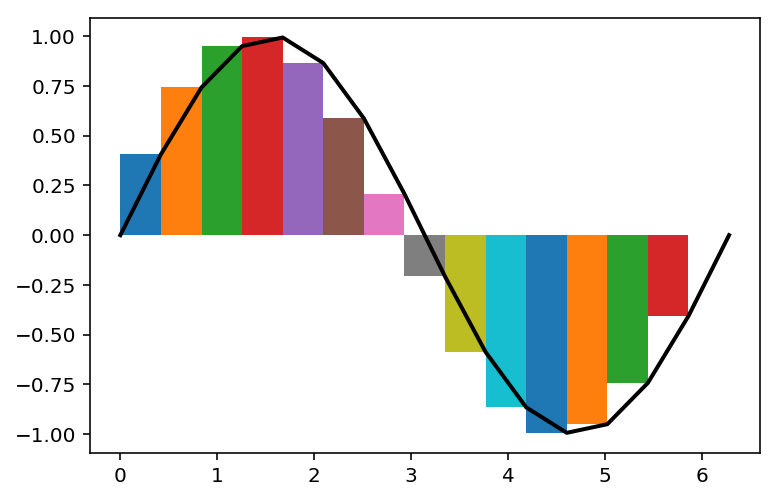

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

xl = [xi+i*dx for i in range(int(nn+1))]
fl = [f(x) for x in xl]

for i, x in enumerate(xl[1:]):
    plt.bar(x-dx/2., fl[i+1], dx)

plt.plot(xl, fl, "k-", lw="2")
plt.show()

## TRAPEZ Yöntemi

In [32]:
from sympy import *
from IPython.display import Markdown, display
init_printing()

X, i, dx = symbols('X, i, dx')
x = IndexedBase('x')
f = IndexedBase('f')

def b(X):
    return (X-x[i+1])/(x[i]-x[i+1])

def c(X):
    return (X-x[i])/(x[i+1]-x[i])

P = lambda X: b(X)*f[i] + c(X)*f[i+1]

integ1 = simplify(integrate(P(X),(X, x[i], x[i+1])))
integ2 = simplify(integ1.subs(x[i+1], x[i]+dx))

S = lambda j: integ2.subs(i,j)

In [33]:
display(Markdown("$\Large P(X) = %s$"%latex(P(X))))

display(Markdown("$s_i \eqsim \int\limits^{x_{i+1}}_{x_{i}} P(x) dx = %s$"%latex(integ1)))

display(Markdown("$\Large s_i \eqsim \int\limits^{x_{i}+dx}_{x_{i}} P(x) dx = %s$"%latex(integ2)))

display(Markdown("$S \eqsim \large %s$"%latex(simplify(sum([S(j) for j in range(1,16,1)])))))

$\Large P(X) = \frac{\left(X - {x}_{i + 1}\right) {f}_{i}}{- {x}_{i + 1} + {x}_{i}} + \frac{\left(X - {x}_{i}\right) {f}_{i + 1}}{{x}_{i + 1} - {x}_{i}}$

$s_i \eqsim \int\limits^{x_{i+1}}_{x_{i}} P(x) dx = \frac{{f}_{i + 1} {x}_{i + 1}}{2} - \frac{{f}_{i + 1} {x}_{i}}{2} + \frac{{f}_{i} {x}_{i + 1}}{2} - \frac{{f}_{i} {x}_{i}}{2}$

$\Large s_i \eqsim \int\limits^{x_{i}+dx}_{x_{i}} P(x) dx = \frac{dx \left({f}_{i + 1} + {f}_{i}\right)}{2}$

$S \eqsim \large \frac{dx \left(2 {f}_{10} + 2 {f}_{11} + 2 {f}_{12} + 2 {f}_{13} + 2 {f}_{14} + 2 {f}_{15} + {f}_{16} + {f}_{1} + 2 {f}_{2} + 2 {f}_{3} + 2 {f}_{4} + 2 {f}_{5} + 2 {f}_{6} + 2 {f}_{7} + 2 {f}_{8} + 2 {f}_{9}\right)}{2}$

In [34]:
def trapez_integral(xi=0., xs=10., nn=10.):
    dx = abs(xs-xi)/nn
    i = 1.
    toplam = 0.
    print "%5s %5s"%("x", "f(x)")
    while i<nn:
        x = xi + i*dx
        i = i + 1
        toplam = toplam + f(x)
        #print "%5s %5s"%(x, f(x))

    toplam = (toplam + (f(xi)+f(xs))/2.)*dx
    return toplam

def yamuk(x1,x2,y1,y2):
    return plt.fill([x1, x1, x2, x2], [0, y1, y2, 0])

def trapez_grafik(xi=0., xs=10., nn=10.):
    dx = abs(xs-xi)/nn
    
    # yamuklar için gerekli bilgiler
    xl = [xi+i*dx for i in range(int(nn+1))]
    fl = [f(x) for x in xl]

    # asıl fonksiyon için gerekli bilgiler
    xlf = [xi+i*dx/10. for i in range(int(10*nn+1))]
    flf = [f(x) for x in xlf]

    # trapez için gerekli yamukları çiziyor
    for i, x in enumerate(xl[:-1]):
        yamuk(xl[i], xl[i+1], fl[i], fl[i+1])

    # asıl fonksiyonu çiziyor
    plt.plot(xlf, flf, "k-", lw="2")
    plt.show()

    x  f(x)
f(x)'in 0.0 ile 10.0 aralığındaki integrali = 50.0


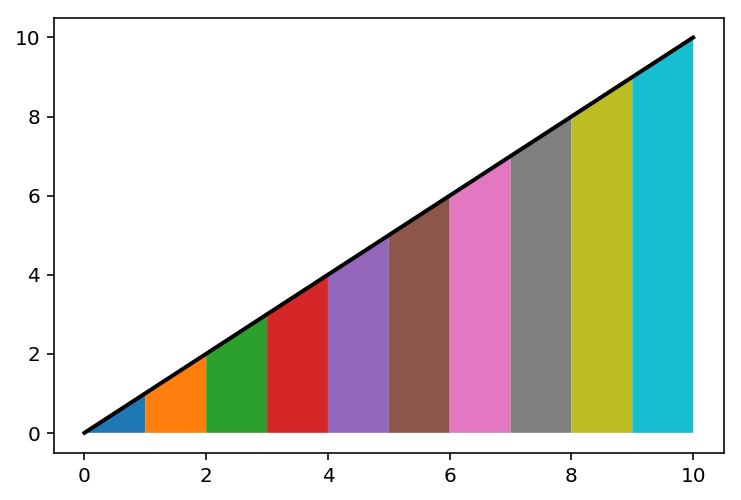

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
    
def f(x):
    return x

xi, xs, nn = 0., 10., 10.

toplam = trapez_integral(xi, xs, nn)
print "f(x)'in %s ile %s aralığındaki integrali = %s"%(xi, xs, toplam)
trapez_grafik(xi, xs, nn)

    x  f(x)
f(x)'in 0.0 ile 4.0 aralığındaki integrali = 56.4266839578


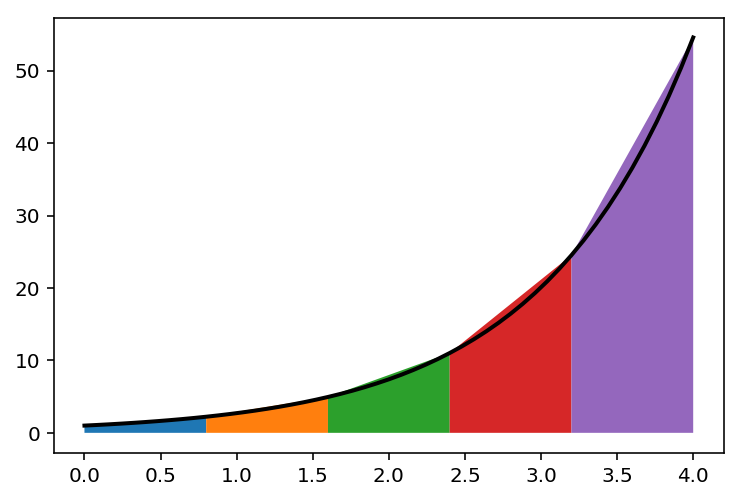

In [36]:
from math import *
import matplotlib.pyplot as plt
%matplotlib inline
    
def f(x):
    return exp(x)

xi, xs, nn = 0., 4., 5.

toplam = trapez_integral(xi, xs, nn)
print "f(x)'in %s ile %s aralığındaki integrali = %s"%(xi, xs, toplam)
trapez_grafik(xi, xs, nn)

    x  f(x)
f(x)'in 0.0 ile 6.28318530718 aralığındaki integrali = -1.28244712915e-16


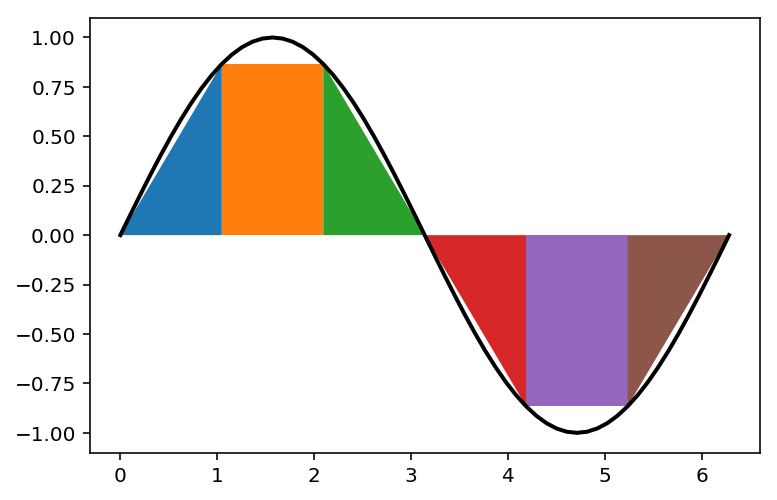

In [37]:
from math import *
import matplotlib.pyplot as plt
%matplotlib inline
    
def f(x):
    return sin(x)

xi, xs, nn = 0., 2*pi, 6.

toplam = trapez_integral(xi, xs, nn)
print "f(x)'in %s ile %s aralığındaki integrali = %s"%(xi, xs, toplam)
trapez_grafik(xi, xs, nn)

## SIMPSON Yöntemi

## 3 noktalı Simpson

Aşağıda verilen kod 3 nokta içeren Simpson integral yönteminin elde edilişini gösterir.

In [38]:
from sympy import *
from IPython.display import Markdown, display
init_printing()

X, i, dx = symbols('X, i, dx')
x = IndexedBase('x')
f = IndexedBase('f')

def a(X):
    return (X-x[i])*(X-x[i+1])/((x[i-1]-x[i])*(x[i-1]-x[i+1]))

def b(X):
    return (X-x[i-1])*(X-x[i+1])/((x[i]-x[i-1])*(x[i]-x[i+1]))

def c(X):
    return (X-x[i-1])*(X-x[i])/((x[i+1]-x[i-1])*(x[i+1]-x[i]))

P = lambda X: a(X)*f[i-1] + b(X)*f[i] + c(X)*f[i+1]

integ1 = simplify(integrate(P(X),(X, x[i-1], x[i+1])))
integ2 = simplify(integ1.subs(x[i-1], x[i]-dx).subs(x[i+1], x[i]+dx))

S = lambda j: integ2.subs(i,j)

In [39]:
display(Markdown("$\Large P(X) = %s$"%latex(P(X))))

display(Markdown("$s_i \eqsim \int\limits^{x_{i+1}}_{x_{i-1}} P(x) dx = %s$"%latex(integ1)))

display(Markdown("$\Large s_i \eqsim \int\limits^{x_{i}+dx}_{x_{i}-dx} P(x) dx = %s$"%latex(integ2)))

display(Markdown("$S \eqsim \large %s$"%latex(simplify(sum([S(j) for j in range(1,16,2)])))))

$\Large P(X) = \frac{\left(X - {x}_{i + 1}\right) \left(X - {x}_{i - 1}\right) {f}_{i}}{\left(- {x}_{i + 1} + {x}_{i}\right) \left(- {x}_{i - 1} + {x}_{i}\right)} + \frac{\left(X - {x}_{i + 1}\right) \left(X - {x}_{i}\right) {f}_{i - 1}}{\left(- {x}_{i + 1} + {x}_{i - 1}\right) \left({x}_{i - 1} - {x}_{i}\right)} + \frac{\left(X - {x}_{i - 1}\right) \left(X - {x}_{i}\right) {f}_{i + 1}}{\left({x}_{i + 1} - {x}_{i - 1}\right) \left({x}_{i + 1} - {x}_{i}\right)}$

$s_i \eqsim \int\limits^{x_{i+1}}_{x_{i-1}} P(x) dx = \frac{2 {f}_{i + 1} {x}_{i + 1}^{2} {x}_{i - 1} - 2 {f}_{i + 1} {x}_{i + 1}^{2} {x}_{i} - {f}_{i + 1} {x}_{i + 1} {x}_{i - 1}^{2} - 2 {f}_{i + 1} {x}_{i + 1} {x}_{i - 1} {x}_{i} + 3 {f}_{i + 1} {x}_{i + 1} {x}_{i}^{2} - {f}_{i + 1} {x}_{i - 1}^{3} + 4 {f}_{i + 1} {x}_{i - 1}^{2} {x}_{i} - 3 {f}_{i + 1} {x}_{i - 1} {x}_{i}^{2} + {f}_{i - 1} {x}_{i + 1}^{3} + {f}_{i - 1} {x}_{i + 1}^{2} {x}_{i - 1} - 4 {f}_{i - 1} {x}_{i + 1}^{2} {x}_{i} - 2 {f}_{i - 1} {x}_{i + 1} {x}_{i - 1}^{2} + 2 {f}_{i - 1} {x}_{i + 1} {x}_{i - 1} {x}_{i} + 3 {f}_{i - 1} {x}_{i + 1} {x}_{i}^{2} + 2 {f}_{i - 1} {x}_{i - 1}^{2} {x}_{i} - 3 {f}_{i - 1} {x}_{i - 1} {x}_{i}^{2} - {f}_{i} {x}_{i + 1}^{3} + 3 {f}_{i} {x}_{i + 1}^{2} {x}_{i - 1} - 3 {f}_{i} {x}_{i + 1} {x}_{i - 1}^{2} + {f}_{i} {x}_{i - 1}^{3}}{6 \left({x}_{i + 1} {x}_{i - 1} - {x}_{i + 1} {x}_{i} - {x}_{i - 1} {x}_{i} + {x}_{i}^{2}\right)}$

$\Large s_i \eqsim \int\limits^{x_{i}+dx}_{x_{i}-dx} P(x) dx = \frac{dx \left({f}_{i + 1} + {f}_{i - 1} + 4 {f}_{i}\right)}{3}$

$S \eqsim \large \frac{dx \left({f}_{0} + 2 {f}_{10} + 4 {f}_{11} + 2 {f}_{12} + 4 {f}_{13} + 2 {f}_{14} + 4 {f}_{15} + {f}_{16} + 4 {f}_{1} + 2 {f}_{2} + 4 {f}_{3} + 2 {f}_{4} + 4 {f}_{5} + 2 {f}_{6} + 4 {f}_{7} + 2 {f}_{8} + 4 {f}_{9}\right)}{3}$

## 4 noktalı Simpson
Aşağıda verilen kod 4 nokta içeren Simpson integral yönteminin elde edilişini gösterir.

In [40]:
from sympy import *
from IPython.display import Markdown, display
init_printing()

X, i, dx = symbols('X, i, dx')
x = IndexedBase('x')
f = IndexedBase('f')

def a(X):
    return (X-x[i])*(X-x[i+1])*(X-x[i+2])/((x[i-1]-x[i])*(x[i-1]-x[i+1])*(x[i-1]-x[i+2]))

def b(X):
    return (X-x[i-1])*(X-x[i+1])*(X-x[i+2])/((x[i]-x[i-1])*(x[i]-x[i+1])*(x[i]-x[i+2]))

def c(X):
    return (X-x[i-1])*(X-x[i])*(X-x[i+2])/((x[i+1]-x[i-1])*(x[i+1]-x[i])*(x[i+1]-x[i+2]))

def d(X):
    return (X-x[i-1])*(X-x[i])*(X-x[i+1])/((x[i+2]-x[i-1])*(x[i+2]-x[i])*(x[i+2]-x[i+1]))

P = lambda X: a(X)*f[i-1] + b(X)*f[i] + c(X)*f[i+1] + d(X)*f[i+2]

integ1 = simplify(integrate(P(X),(X, x[i-1], x[i+2])))
integ2 = simplify(integ1.subs(x[i-1], x[i]-dx).subs(x[i+1], x[i]+dx).subs(x[i+2], x[i]+2*dx))

S = lambda j: integ2.subs(i,j)

In [41]:
display(Markdown("$\Large P(X) = %s$"%latex(P(X))))

display(Markdown("$s_i \eqsim \int\limits^{x_{i+2}}_{x_{i-1}} P(x) dx = %s$"%latex(integ1)))

display(Markdown("$\Large s_i \eqsim \int\limits^{x_{i}+2dx}_{x_{i}-dx} P(x) dx = %s$"%latex(integ2)))

display(Markdown("$S \eqsim \large %s$"%latex(simplify(sum([S(j) for j in range(1,16,3)])))))

$\Large P(X) = \frac{\left(X - {x}_{i + 1}\right) \left(X - {x}_{i + 2}\right) \left(X - {x}_{i - 1}\right) {f}_{i}}{\left(- {x}_{i + 1} + {x}_{i}\right) \left(- {x}_{i + 2} + {x}_{i}\right) \left(- {x}_{i - 1} + {x}_{i}\right)} + \frac{\left(X - {x}_{i + 1}\right) \left(X - {x}_{i + 2}\right) \left(X - {x}_{i}\right) {f}_{i - 1}}{\left(- {x}_{i + 1} + {x}_{i - 1}\right) \left(- {x}_{i + 2} + {x}_{i - 1}\right) \left({x}_{i - 1} - {x}_{i}\right)} + \frac{\left(X - {x}_{i + 1}\right) \left(X - {x}_{i - 1}\right) \left(X - {x}_{i}\right) {f}_{i + 2}}{\left(- {x}_{i + 1} + {x}_{i + 2}\right) \left({x}_{i + 2} - {x}_{i - 1}\right) \left({x}_{i + 2} - {x}_{i}\right)} + \frac{\left(X - {x}_{i + 2}\right) \left(X - {x}_{i - 1}\right) \left(X - {x}_{i}\right) {f}_{i + 1}}{\left({x}_{i + 1} - {x}_{i + 2}\right) \left({x}_{i + 1} - {x}_{i - 1}\right) \left({x}_{i + 1} - {x}_{i}\right)}$

$s_i \eqsim \int\limits^{x_{i+2}}_{x_{i-1}} P(x) dx = - \frac{{f}_{i + 1} {x}_{i + 2}^{5} {x}_{i - 1} - {f}_{i + 1} {x}_{i + 2}^{5} {x}_{i} - 2 {f}_{i + 1} {x}_{i + 2}^{4} {x}_{i - 1}^{2} - {f}_{i + 1} {x}_{i + 2}^{4} {x}_{i - 1} {x}_{i} + 3 {f}_{i + 1} {x}_{i + 2}^{4} {x}_{i}^{2} + 8 {f}_{i + 1} {x}_{i + 2}^{3} {x}_{i - 1}^{2} {x}_{i} - 6 {f}_{i + 1} {x}_{i + 2}^{3} {x}_{i - 1} {x}_{i}^{2} - 2 {f}_{i + 1} {x}_{i + 2}^{3} {x}_{i}^{3} + 2 {f}_{i + 1} {x}_{i + 2}^{2} {x}_{i - 1}^{4} - 8 {f}_{i + 1} {x}_{i + 2}^{2} {x}_{i - 1}^{3} {x}_{i} + 6 {f}_{i + 1} {x}_{i + 2}^{2} {x}_{i - 1} {x}_{i}^{3} - {f}_{i + 1} {x}_{i + 2} {x}_{i - 1}^{5} + {f}_{i + 1} {x}_{i + 2} {x}_{i - 1}^{4} {x}_{i} + 6 {f}_{i + 1} {x}_{i + 2} {x}_{i - 1}^{3} {x}_{i}^{2} - 6 {f}_{i + 1} {x}_{i + 2} {x}_{i - 1}^{2} {x}_{i}^{3} + {f}_{i + 1} {x}_{i - 1}^{5} {x}_{i} - 3 {f}_{i + 1} {x}_{i - 1}^{4} {x}_{i}^{2} + 2 {f}_{i + 1} {x}_{i - 1}^{3} {x}_{i}^{3} - 4 {f}_{i + 2} {x}_{i + 1}^{3} {x}_{i + 2}^{2} {x}_{i - 1} + 4 {f}_{i + 2} {x}_{i + 1}^{3} {x}_{i + 2}^{2} {x}_{i} + 2 {f}_{i + 2} {x}_{i + 1}^{3} {x}_{i + 2} {x}_{i - 1}^{2} + 4 {f}_{i + 2} {x}_{i + 1}^{3} {x}_{i + 2} {x}_{i - 1} {x}_{i} - 6 {f}_{i + 2} {x}_{i + 1}^{3} {x}_{i + 2} {x}_{i}^{2} + 2 {f}_{i + 2} {x}_{i + 1}^{3} {x}_{i - 1}^{3} - 8 {f}_{i + 2} {x}_{i + 1}^{3} {x}_{i - 1}^{2} {x}_{i} + 6 {f}_{i + 2} {x}_{i + 1}^{3} {x}_{i - 1} {x}_{i}^{2} + 3 {f}_{i + 2} {x}_{i + 1}^{2} {x}_{i + 2}^{3} {x}_{i - 1} - 3 {f}_{i + 2} {x}_{i + 1}^{2} {x}_{i + 2}^{3} {x}_{i} + 3 {f}_{i + 2} {x}_{i + 1}^{2} {x}_{i + 2}^{2} {x}_{i - 1}^{2} - 3 {f}_{i + 2} {x}_{i + 1}^{2} {x}_{i + 2}^{2} {x}_{i - 1} {x}_{i} - 3 {f}_{i + 2} {x}_{i + 1}^{2} {x}_{i + 2} {x}_{i - 1}^{3} - 3 {f}_{i + 2} {x}_{i + 1}^{2} {x}_{i + 2} {x}_{i - 1}^{2} {x}_{i} + 6 {f}_{i + 2} {x}_{i + 1}^{2} {x}_{i + 2} {x}_{i}^{3} - 3 {f}_{i + 2} {x}_{i + 1}^{2} {x}_{i - 1}^{4} + 9 {f}_{i + 2} {x}_{i + 1}^{2} {x}_{i - 1}^{3} {x}_{i} - 6 {f}_{i + 2} {x}_{i + 1}^{2} {x}_{i - 1} {x}_{i}^{3} - 3 {f}_{i + 2} {x}_{i + 1} {x}_{i + 2}^{3} {x}_{i - 1}^{2} + 3 {f}_{i + 2} {x}_{i + 1} {x}_{i + 2}^{3} {x}_{i}^{2} + {f}_{i + 2} {x}_{i + 1} {x}_{i + 2}^{2} {x}_{i - 1}^{3} + 3 {f}_{i + 2} {x}_{i + 1} {x}_{i + 2}^{2} {x}_{i - 1} {x}_{i}^{2} - 4 {f}_{i + 2} {x}_{i + 1} {x}_{i + 2}^{2} {x}_{i}^{3} + {f}_{i + 2} {x}_{i + 1} {x}_{i + 2} {x}_{i - 1}^{4} + 3 {f}_{i + 2} {x}_{i + 1} {x}_{i + 2} {x}_{i - 1}^{2} {x}_{i}^{2} - 4 {f}_{i + 2} {x}_{i + 1} {x}_{i + 2} {x}_{i - 1} {x}_{i}^{3} + {f}_{i + 2} {x}_{i + 1} {x}_{i - 1}^{5} - 9 {f}_{i + 2} {x}_{i + 1} {x}_{i - 1}^{3} {x}_{i}^{2} + 8 {f}_{i + 2} {x}_{i + 1} {x}_{i - 1}^{2} {x}_{i}^{3} + 3 {f}_{i + 2} {x}_{i + 2}^{3} {x}_{i - 1}^{2} {x}_{i} - 3 {f}_{i + 2} {x}_{i + 2}^{3} {x}_{i - 1} {x}_{i}^{2} - {f}_{i + 2} {x}_{i + 2}^{2} {x}_{i - 1}^{3} {x}_{i} - 3 {f}_{i + 2} {x}_{i + 2}^{2} {x}_{i - 1}^{2} {x}_{i}^{2} + 4 {f}_{i + 2} {x}_{i + 2}^{2} {x}_{i - 1} {x}_{i}^{3} - {f}_{i + 2} {x}_{i + 2} {x}_{i - 1}^{4} {x}_{i} + 3 {f}_{i + 2} {x}_{i + 2} {x}_{i - 1}^{3} {x}_{i}^{2} - 2 {f}_{i + 2} {x}_{i + 2} {x}_{i - 1}^{2} {x}_{i}^{3} - {f}_{i + 2} {x}_{i - 1}^{5} {x}_{i} + 3 {f}_{i + 2} {x}_{i - 1}^{4} {x}_{i}^{2} - 2 {f}_{i + 2} {x}_{i - 1}^{3} {x}_{i}^{3} - 2 {f}_{i - 1} {x}_{i + 1}^{3} {x}_{i + 2}^{3} - 2 {f}_{i - 1} {x}_{i + 1}^{3} {x}_{i + 2}^{2} {x}_{i - 1} + 8 {f}_{i - 1} {x}_{i + 1}^{3} {x}_{i + 2}^{2} {x}_{i} + 4 {f}_{i - 1} {x}_{i + 1}^{3} {x}_{i + 2} {x}_{i - 1}^{2} - 4 {f}_{i - 1} {x}_{i + 1}^{3} {x}_{i + 2} {x}_{i - 1} {x}_{i} - 6 {f}_{i - 1} {x}_{i + 1}^{3} {x}_{i + 2} {x}_{i}^{2} - 4 {f}_{i - 1} {x}_{i + 1}^{3} {x}_{i - 1}^{2} {x}_{i} + 6 {f}_{i - 1} {x}_{i + 1}^{3} {x}_{i - 1} {x}_{i}^{2} + 3 {f}_{i - 1} {x}_{i + 1}^{2} {x}_{i + 2}^{4} + 3 {f}_{i - 1} {x}_{i + 1}^{2} {x}_{i + 2}^{3} {x}_{i - 1} - 9 {f}_{i - 1} {x}_{i + 1}^{2} {x}_{i + 2}^{3} {x}_{i} - 3 {f}_{i - 1} {x}_{i + 1}^{2} {x}_{i + 2}^{2} {x}_{i - 1}^{2} + 3 {f}_{i - 1} {x}_{i + 1}^{2} {x}_{i + 2}^{2} {x}_{i - 1} {x}_{i} - 3 {f}_{i - 1} {x}_{i + 1}^{2} {x}_{i + 2} {x}_{i - 1}^{3} + 3 {f}_{i - 1} {x}_{i + 1}^{2} {x}_{i + 2} {x}_{i - 1}^{2} {x}_{i} + 6 {f}_{i - 1} {x}_{i + 1}^{2} {x}_{i + 2} {x}_{i}^{3} + 3 {f}_{i - 1} {x}_{i + 1}^{2} {x}_{i - 1}^{3} {x}_{i} - 6 {f}_{i - 1} {x}_{i + 1}^{2} {x}_{i - 1} {x}_{i}^{3} - {f}_{i - 1} {x}_{i + 1} {x}_{i + 2}^{5} - {f}_{i - 1} {x}_{i + 1} {x}_{i + 2}^{4} {x}_{i - 1} - {f}_{i - 1} {x}_{i + 1} {x}_{i + 2}^{3} {x}_{i - 1}^{2} + 9 {f}_{i - 1} {x}_{i + 1} {x}_{i + 2}^{3} {x}_{i}^{2} + 3 {f}_{i - 1} {x}_{i + 1} {x}_{i + 2}^{2} {x}_{i - 1}^{3} - 3 {f}_{i - 1} {x}_{i + 1} {x}_{i + 2}^{2} {x}_{i - 1} {x}_{i}^{2} - 8 {f}_{i - 1} {x}_{i + 1} {x}_{i + 2}^{2} {x}_{i}^{3} - 3 {f}_{i - 1} {x}_{i + 1} {x}_{i + 2} {x}_{i - 1}^{2} {x}_{i}^{2} + 4 {f}_{i - 1} {x}_{i + 1} {x}_{i + 2} {x}_{i - 1} {x}_{i}^{3} - 3 {f}_{i - 1} {x}_{i + 1} {x}_{i - 1}^{3} {x}_{i}^{2} + 4 {f}_{i - 1} {x}_{i + 1} {x}_{i - 1}^{2} {x}_{i}^{3} + {f}_{i - 1} {x}_{i + 2}^{5} {x}_{i} + {f}_{i - 1} {x}_{i + 2}^{4} {x}_{i - 1} {x}_{i} - 3 {f}_{i - 1} {x}_{i + 2}^{4} {x}_{i}^{2} + {f}_{i - 1} {x}_{i + 2}^{3} {x}_{i - 1}^{2} {x}_{i} - 3 {f}_{i - 1} {x}_{i + 2}^{3} {x}_{i - 1} {x}_{i}^{2} + 2 {f}_{i - 1} {x}_{i + 2}^{3} {x}_{i}^{3} - 3 {f}_{i - 1} {x}_{i + 2}^{2} {x}_{i - 1}^{3} {x}_{i} + 3 {f}_{i - 1} {x}_{i + 2}^{2} {x}_{i - 1}^{2} {x}_{i}^{2} + 2 {f}_{i - 1} {x}_{i + 2}^{2} {x}_{i - 1} {x}_{i}^{3} + 3 {f}_{i - 1} {x}_{i + 2} {x}_{i - 1}^{3} {x}_{i}^{2} - 4 {f}_{i - 1} {x}_{i + 2} {x}_{i - 1}^{2} {x}_{i}^{3} + 2 {f}_{i} {x}_{i + 1}^{3} {x}_{i + 2}^{3} - 6 {f}_{i} {x}_{i + 1}^{3} {x}_{i + 2}^{2} {x}_{i - 1} + 6 {f}_{i} {x}_{i + 1}^{3} {x}_{i + 2} {x}_{i - 1}^{2} - 2 {f}_{i} {x}_{i + 1}^{3} {x}_{i - 1}^{3} - 3 {f}_{i} {x}_{i + 1}^{2} {x}_{i + 2}^{4} + 6 {f}_{i} {x}_{i + 1}^{2} {x}_{i + 2}^{3} {x}_{i - 1} - 6 {f}_{i} {x}_{i + 1}^{2} {x}_{i + 2} {x}_{i - 1}^{3} + 3 {f}_{i} {x}_{i + 1}^{2} {x}_{i - 1}^{4} + {f}_{i} {x}_{i + 1} {x}_{i + 2}^{5} + {f}_{i} {x}_{i + 1} {x}_{i + 2}^{4} {x}_{i - 1} - 8 {f}_{i} {x}_{i + 1} {x}_{i + 2}^{3} {x}_{i - 1}^{2} + 8 {f}_{i} {x}_{i + 1} {x}_{i + 2}^{2} {x}_{i - 1}^{3} - {f}_{i} {x}_{i + 1} {x}_{i + 2} {x}_{i - 1}^{4} - {f}_{i} {x}_{i + 1} {x}_{i - 1}^{5} - {f}_{i} {x}_{i + 2}^{5} {x}_{i - 1} + 2 {f}_{i} {x}_{i + 2}^{4} {x}_{i - 1}^{2} - 2 {f}_{i} {x}_{i + 2}^{2} {x}_{i - 1}^{4} + {f}_{i} {x}_{i + 2} {x}_{i - 1}^{5}}{12 {x}_{i + 1}^{3} {x}_{i + 2} {x}_{i - 1} - 12 {x}_{i + 1}^{3} {x}_{i + 2} {x}_{i} - 12 {x}_{i + 1}^{3} {x}_{i - 1} {x}_{i} + 12 {x}_{i + 1}^{3} {x}_{i}^{2} - 12 {x}_{i + 1}^{2} {x}_{i + 2}^{2} {x}_{i - 1} + 12 {x}_{i + 1}^{2} {x}_{i + 2}^{2} {x}_{i} - 12 {x}_{i + 1}^{2} {x}_{i + 2} {x}_{i - 1}^{2} + 12 {x}_{i + 1}^{2} {x}_{i + 2} {x}_{i - 1} {x}_{i} + 12 {x}_{i + 1}^{2} {x}_{i - 1}^{2} {x}_{i} - 12 {x}_{i + 1}^{2} {x}_{i}^{3} + 12 {x}_{i + 1} {x}_{i + 2}^{2} {x}_{i - 1}^{2} - 12 {x}_{i + 1} {x}_{i + 2}^{2} {x}_{i}^{2} - 12 {x}_{i + 1} {x}_{i + 2} {x}_{i - 1} {x}_{i}^{2} + 12 {x}_{i + 1} {x}_{i + 2} {x}_{i}^{3} - 12 {x}_{i + 1} {x}_{i - 1}^{2} {x}_{i}^{2} + 12 {x}_{i + 1} {x}_{i - 1} {x}_{i}^{3} - 12 {x}_{i + 2}^{2} {x}_{i - 1}^{2} {x}_{i} + 12 {x}_{i + 2}^{2} {x}_{i - 1} {x}_{i}^{2} + 12 {x}_{i + 2} {x}_{i - 1}^{2} {x}_{i}^{2} - 12 {x}_{i + 2} {x}_{i - 1} {x}_{i}^{3}}$

$\Large s_i \eqsim \int\limits^{x_{i}+2dx}_{x_{i}-dx} P(x) dx = \frac{3 dx \left(3 {f}_{i + 1} + {f}_{i + 2} + {f}_{i - 1} + 3 {f}_{i}\right)}{8}$

$S \eqsim \large \frac{3 dx \left({f}_{0} + 3 {f}_{10} + 3 {f}_{11} + 2 {f}_{12} + 3 {f}_{13} + 3 {f}_{14} + {f}_{15} + 3 {f}_{1} + 3 {f}_{2} + 2 {f}_{3} + 3 {f}_{4} + 3 {f}_{5} + 2 {f}_{6} + 3 {f}_{7} + 3 {f}_{8} + 2 {f}_{9}\right)}{8}$

In [42]:
def simpson_integral(xi=0., xs=10., nn=10.):
    if nn%2==1:
        nn += 1
        print "nn çift sayıya çevirildi. yeni değeri %s'dir."%nn

    dx = abs(xs-xi)/nn
    # tek indisliler
    i = 1.
    toplam_tek = 0.
    #print "%5s %5s"%("x", "f(x)")
    while i<=nn-1:
        x = xi + i*dx
        i = i + 2
        toplam_tek +=  f(x)
        #print "%5s %5s"%(x, f(x))

    # çift indisliler
    i = 2.
    toplam_cift = 0.
    #print "%5s %5s"%("x", "f(x)")
    while i<=nn-2:
        x = xi + i*dx
        i = i + 2
        toplam_cift += f(x)
        #print "%5s %5s"%(x, f(x))

    toplam = (4*toplam_tek + 2*toplam_cift + f(xi) + f(xs))*dx/3.
    return toplam

# f(x)'i temsil eden polinom fonksiyon
def phi(x, xi, dx):
    phi1 = (x-xi)*(x-xi-dx)*f(xi-dx)/2.
    phi2 = -(x-xi+dx)*(x-xi-dx)*f(xi)
    phi3 = (x-xi+dx)*(x-xi)*f(xi+dx)/2.
    phiT = (phi1 + phi2 + phi3)/dx**2.
    return phiT

def simpson_grafik(xi=0., xs=10., nn=10.):
    if nn%2==1:
        nn += 1
        print "nn çift sayıya çevirildi. yeni değeri %s'dir."%nn
    dx = abs(xs-xi)/nn
    # polinom için gerekli x ve f değerleri
    xl = [xi + i*dx for i in range(int(nn))]
    fl = [f(x) for x in xl]
    # polinom çizimi
    for sx in xl[1::2]:
        xlphi = [sx-dx+i*dx/10. for i in range(21)]
        flphi = [phi(x, sx, dx/10.) for x in xlphi]
        plt.fill_between(xlphi[:11], flphi[:11])
        plt.fill_between(xlphi[10:21], flphi[10:21])

    # fonksiyon için gerekli x ve f değerleri
    xlf = [xi + i*dx/5. for i in range(int(5*nn+1))]
    flf = [f(x) for x in xlf]
    # fonksiyon çizimi
    plt.plot(xlf, flf, "k-", lw="2")

    plt.show()

f(x)'in 0.0 ile 10.0 aralığındaki integrali = 50.0


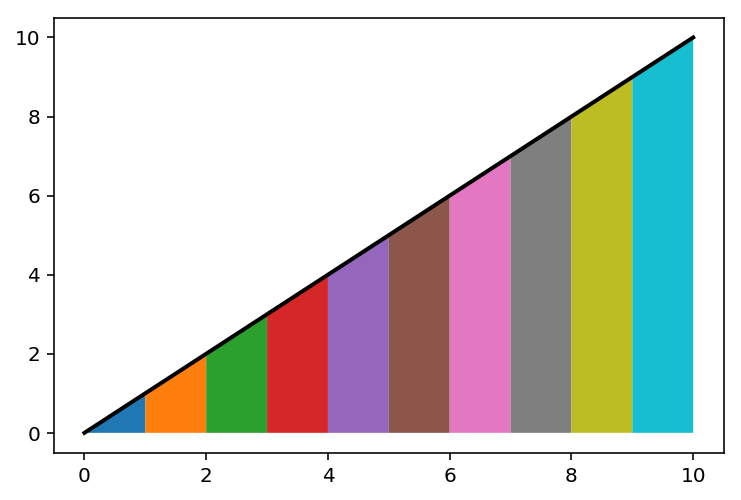

In [43]:
from math import *
import matplotlib.pyplot as plt
%matplotlib inline
    
def f(x):
    return x

xi, xs, nn = 0., 10., 10.
toplam = simpson_integral(xi, xs, nn)
print "f(x)'in %s ile %s aralığındaki integrali = %s"%(xi, xs, toplam)
simpson_grafik(xi, xs, nn)

f(x)'in 0.0 ile 6.28318530718 aralığındaki integrali = -3.1802104181e-16


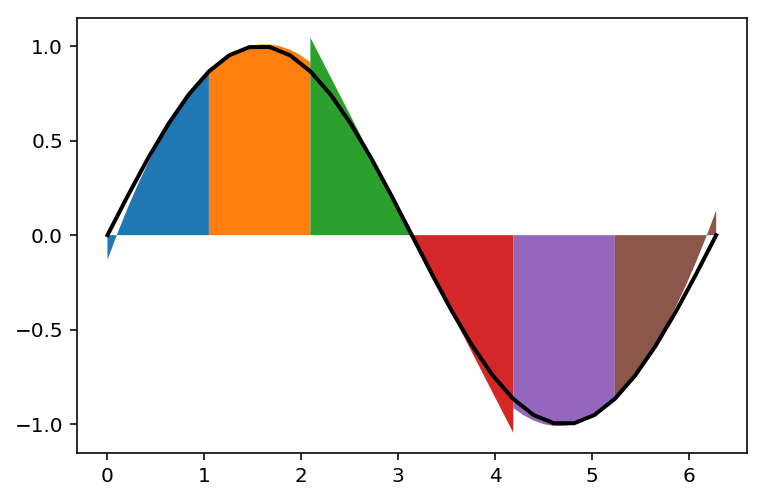

In [44]:
from math import *
import matplotlib.pyplot as plt
%matplotlib inline
    
def f(x):
    return sin(x)

xi, xs, nn = 0., 2*pi, 6.
toplam = simpson_integral(xi, xs, nn)
print "f(x)'in %s ile %s aralığındaki integrali = %s"%(xi, xs, toplam)
simpson_grafik(xi, xs, nn)

# TRAPEZ ve SİMPSON Karşılaştırması

f(x)'in 0.0 ile 1.0 aralığındaki integrali = 1.71828278192


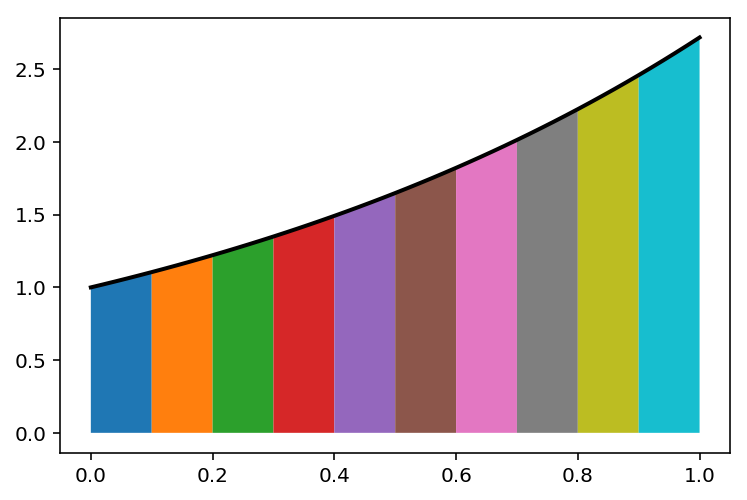

In [45]:
from math import *
import matplotlib.pyplot as plt
%matplotlib inline
    
def f(x):
    return exp(x)

xi, xs, nn = 0., 1., 10.
toplam = simpson_integral(xi, xs, nn)
print "f(x)'in %s ile %s aralığındaki integrali = %s"%(xi, xs, toplam)
simpson_grafik(xi, xs, nn)

int_simpson = toplam

    x  f(x)
f(x)'in 0.0 ile 1.0 aralığındaki integrali = 1.71971349139


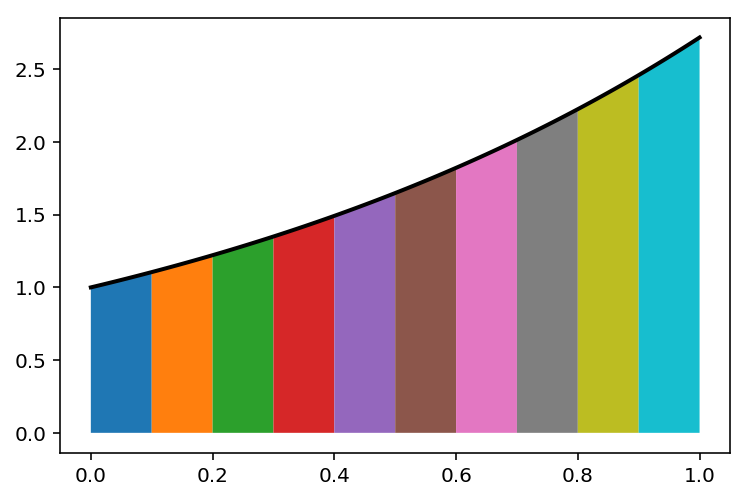

In [46]:
from math import *
import matplotlib.pyplot as plt
%matplotlib inline
    
def f(x):
    return exp(x)

xi, xs, nn = 0., 1., 10.
toplam = trapez_integral(xi, xs, nn)
print "f(x)'in %s ile %s aralığındaki integrali = %s"%(xi, xs, toplam)
trapez_grafik(xi, xs, nn)

int_trapez = toplam

In [47]:
int_tam = exp(1.) - 1.
print "trapez        =", int_trapez
print "simpson       =", int_simpson
print "tam           =", int_tam
print "trapez - tam  =", int_trapez - int_tam
print "simpson - tam =", int_simpson - int_tam

trapez        = 1.71971349139
simpson       = 1.71828278192
tam           = 1.71828182846
trapez - tam  = 0.00143166293027
simpson - tam = 9.53465778775e-07


## TEKİL İNTEGRALLER

### $\int^\infty_0 {e^{-x} \over (1+e^x)} dx \eqsim \int^{20}_0 {e^{-x} \over (1+e^x)} dx$

İntegrand (integralin içi) çok hızlı sıfıra yaklaşıtığı için sonsuz yerine uygun bir üst sınır alabiliriz.

0.306862787035


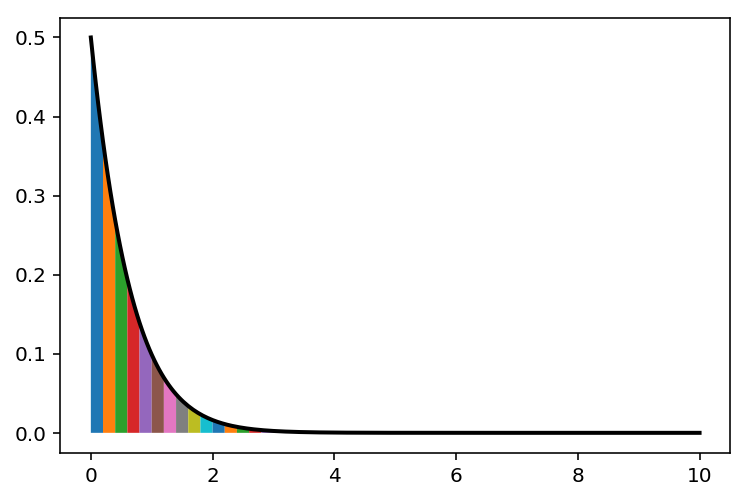

In [48]:
from math import *

def f(x):
    return exp(-x)/(1+exp(x))

print simpson_integral(xi=0., xs=10., nn=50.)
simpson_grafik(xi=0., xs=10., nn=50.)

### $u=e^{-x}$ değişken dönüşümü yapılırsa $\int^1_0 {u \over (u+1)} dx$

0.306852814445


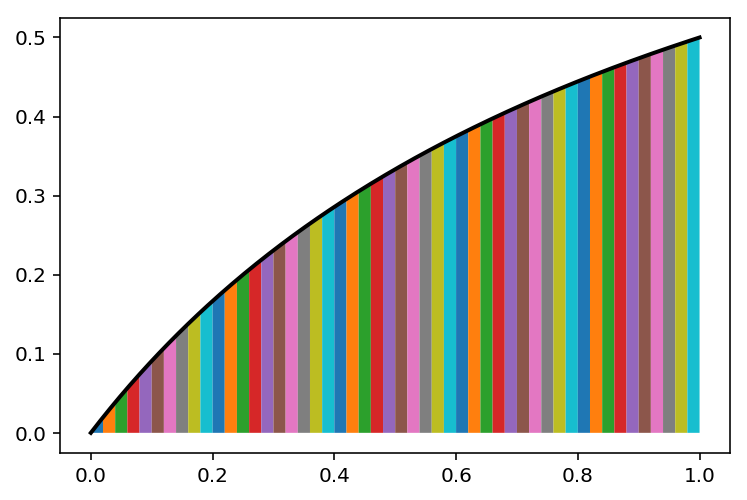

In [49]:
from math import *

def f(u):
    return u/(u+1.)

print simpson_integral(xi=0., xs=1., nn=50.)
simpson_grafik(xi=0., xs=1., nn=50.)

In [50]:
import numpy as np

ul = np.linspace(0,1, 10)

print "f(u) fonksiyonunun davranışı"
for u in ul:
    print "%.5f %5f"%(u, f(u))

f(u) fonksiyonunun davranışı
0.00000 0.000000
0.11111 0.100000
0.22222 0.181818
0.33333 0.250000
0.44444 0.307692
0.55556 0.357143
0.66667 0.400000
0.77778 0.437500
0.88889 0.470588
1.00000 0.500000


### $\int^1_0 {\cos(x) \over \sqrt{x}} dx \eqsim \int^1_\varepsilon {\cos(x) \over \sqrt{x}} dx$; $\varepsilon \rightarrow 0$

$\varepsilon$'u sıfıra yakın bir sayı seçerek tekillikten kurtulmaya çalışabiliriz.  
Fakat bu durumda sayısal hesap güvenilmez hale gelebilir. Sadece $\varepsilon$'u küçültmek  
yeterli olmayabilir. Bu $\Delta x$'i de (integral alma adım miktarı) küçültmek gerekebilir.

2.29663518785


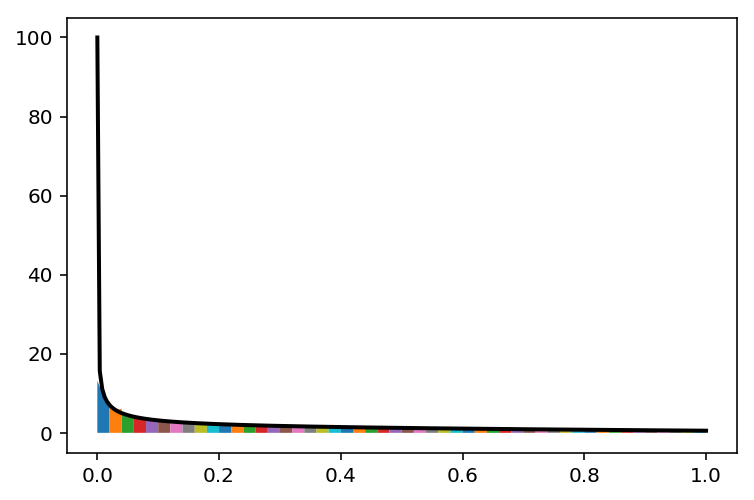

In [51]:
from math import *

def f(x):
    return cos(x)/sqrt(x)

print simpson_integral(xi=0.0001, xs=1., nn=50.)
simpson_grafik(xi=0.0001, xs=1., nn=50.)

### Hem $\varepsilon$ hem de $\Delta x$ çok küçük hale getirilirse...

1.80927726651


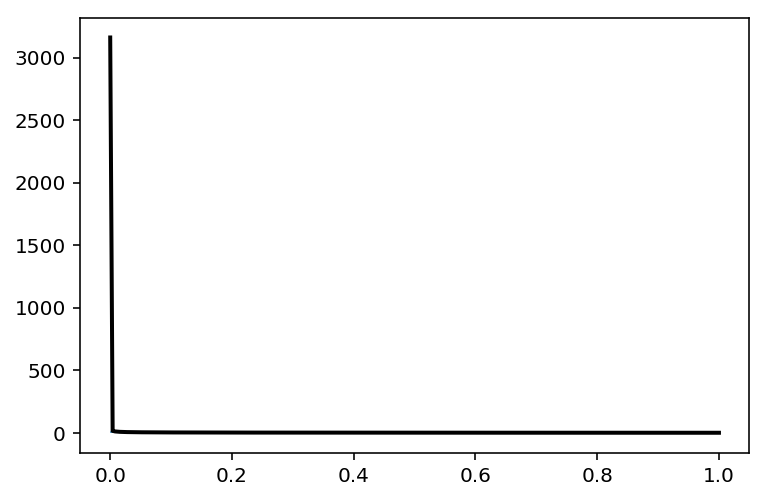

In [52]:
from math import *

def f(x):
    return cos(x)/sqrt(x)

print simpson_integral(xi=0.0000001, xs=1., nn=500000.)
simpson_grafik(xi=0.0000001, xs=1., nn=50.)

### $x=u^2$ dönüşümü ile $\int^1_0 {\cos(x) \over \sqrt{x}} dx = \int^1_0 2\cos(u^2) du$ olur.
Bu şekilde tekillik ortadan kalkmış olur.

1.80904847623


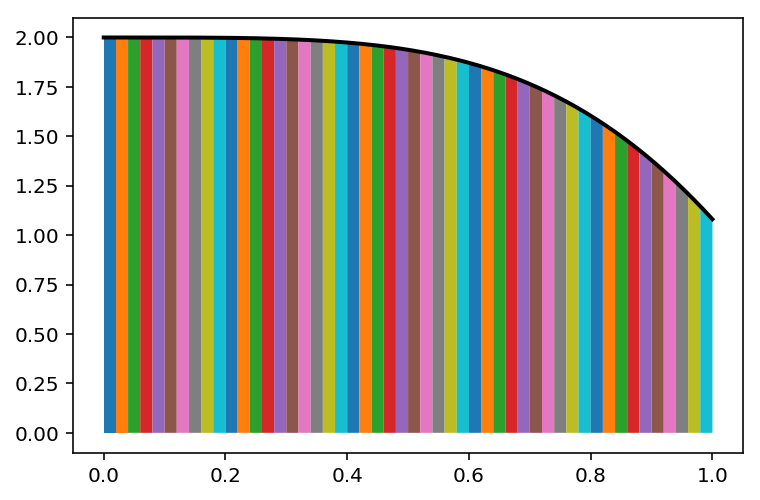

In [53]:
from math import *

def f(u):
    return 2*cos(u**2)

print simpson_integral(xi=0., xs=1., nn=50.)
simpson_grafik(xi=0., xs=1., nn=50.)

## Fresnel İntegralleri

f(x)'in 0.0 ile 1.0 aralığındaki integrali = 0.779893402099


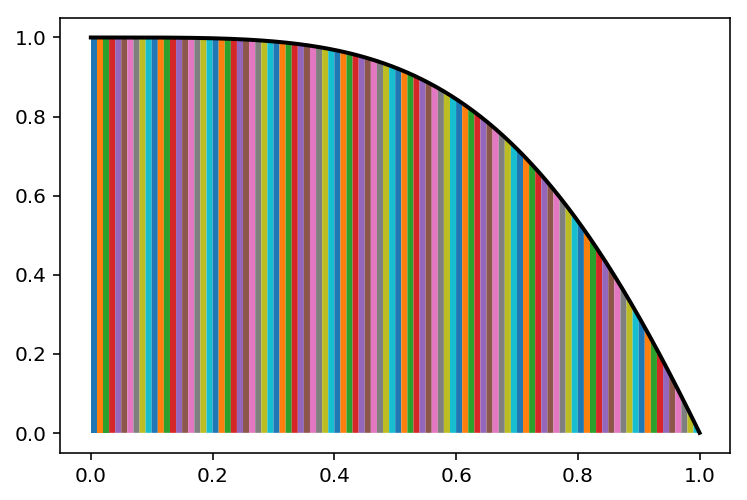

In [54]:
from math import *
import matplotlib.pyplot as plt
%matplotlib inline
    
def f(d):
    return cos(pi*d**2./2.)

xi, xs, nn = 0., 1., 100.
Cd = simpson_integral(xi, xs, nn)
print "f(x)'in %s ile %s aralığındaki integrali = %s"%(xi, xs, Cd)
simpson_grafik(xi, xs, nn)

f(x)'in 0.0 ile 1.0 aralığındaki integrali = 0.438259145745


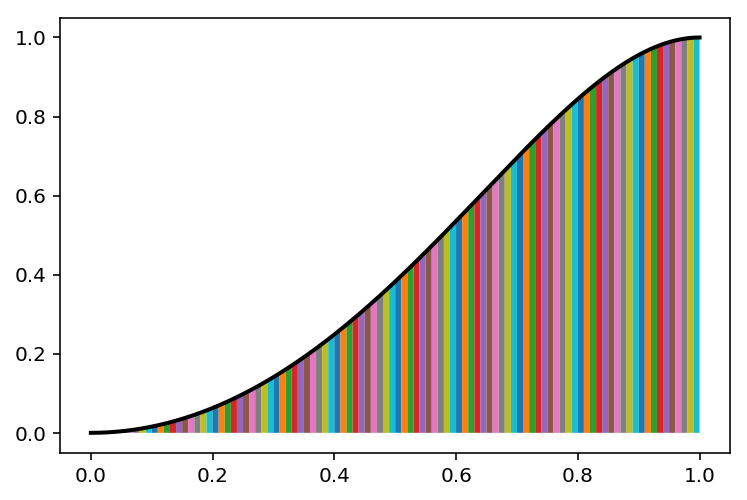

In [55]:
from math import *
import matplotlib.pyplot as plt
%matplotlib inline
    
def f(d):
    return sin(pi*d**2./2.)

xi, xs, nn = 0., 1., 100.
Sd = simpson_integral(xi, xs, nn)
print "f(x)'in %s ile %s aralığındaki integrali = %s"%(xi, xs, Sd)
simpson_grafik(xi, xs, nn)

In [56]:
print ((Cd+.5)**2. + (Sd+.5)**2.)/2.

1.25922867266


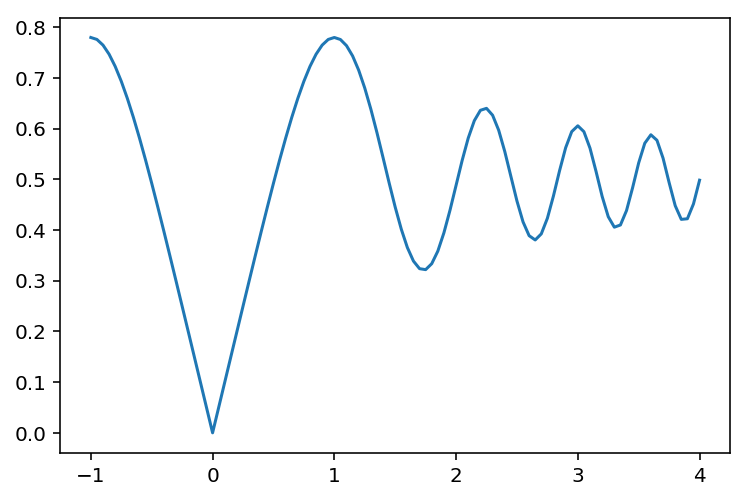

In [57]:
from math import *
import matplotlib.pyplot as plt
%matplotlib inline
    
def f(d):
    return cos(pi*d**2./2.)

xi, nn = 0., 100.
di = -1.
ds = 4.
dd = abs(ds-di)/nn

d = []
Cd = []
for i in range(int(nn)+1):
    d += [di + i*dd]
    Cd += [simpson_integral(xi, d[i], nn)]

plt.plot(d, Cd)
plt.show()

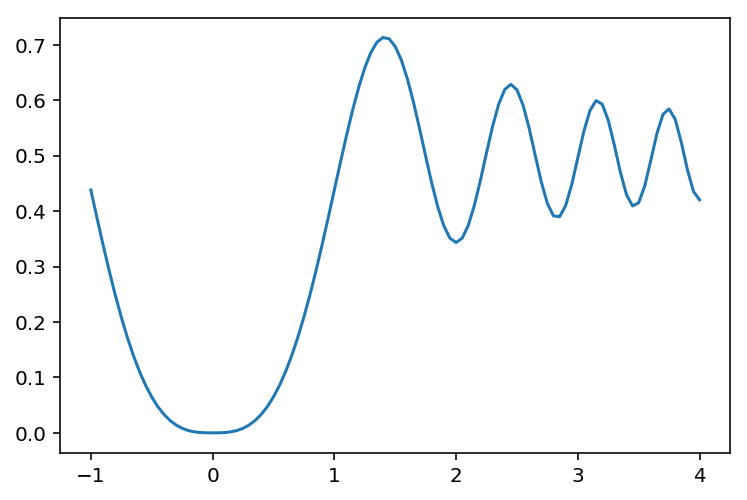

In [58]:
from math import *
import matplotlib.pyplot as plt
%matplotlib inline
    
def f(d):
    return sin(pi*d**2./2.)

xi, nn = 0., 100.
di = -1.
ds = 4.
dd = abs(ds-di)/nn

d = []
Sd = []
for i in range(int(nn)+1):
    d += [di + i*dd]
    Sd += [simpson_integral(xi, d[i], nn)]

plt.plot(d, Sd)
plt.show()

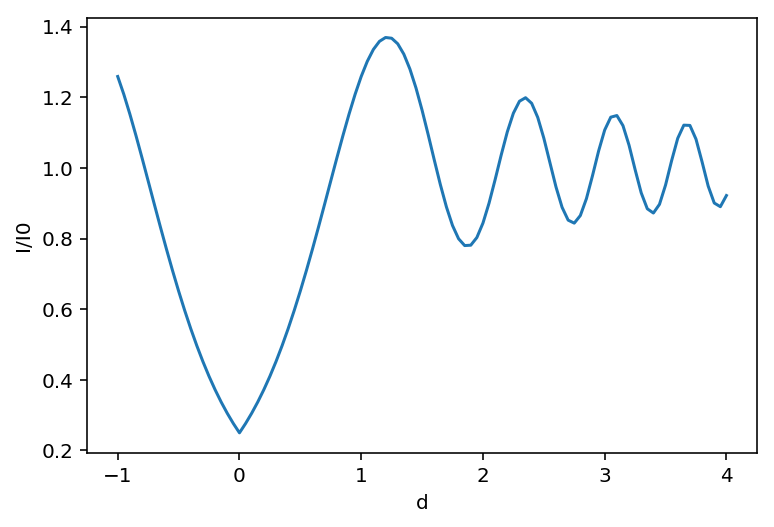

In [59]:
Id = []
for i in range(int(nn)+1):
    Id += [((Cd[i] + 0.5)**2. + (Sd[i] + 0.5)**2.)/2.]

plt.plot(d, Id)
plt.xlabel('d')
plt.ylabel('I/I0')
plt.show()